# Machine Learning for Solar Radiation Prediction in Arid Climates

## Project Overview
This project is focused on developing and analyzing **Machine Learning (ML)** models to accurately predict **solar radiation** in regions with arid and subtropical desert climates. Using meteorological data collected during 2023, we address the challenge of forecasting solar energy in areas lacking specialized measurement equipment. The dataset includes **8 key variables** derived from an extensive feature selection process, facilitated by **Principal Component Analysis (PCA)**.

### Objectives:
1. **Prediction Accuracy**: Employ diverse ML algorithms to predict solar radiation with high precision.
2. **Feature Analysis**: Identify the most significant meteorological variables affecting solar radiation.
3. **Ensemble Modeling**: Integrate multiple ML models to improve generalization and robustness.
4. **Geographic Focus**: Tailor models for arid regions, specifically Lima, Peru, characterized by high humidity and minimal rainfall.

### Dataset and Features:
The meteorological data was recorded at the **National University of Engineering (UNI)** in Lima, Peru. The station measured key variables such as:
- **Outside Temperature**
- **Wind Chill**
- **Dew Point**
- **Heat Index**
- **Pressure**
- **Relative Humidity**
- **Wind Direction**
- **Peak Wind Speed**

These variables were selected after dimensionality reduction via **PCA**, grouping them into three components: thermal sensation, humidity, and wind patterns.


# Index

- [Import Data & Libraries](#import-data--libraries-after-applying-pca-algorithm)
- [ML Models](#ml-models)
- [Annual ML Results](#annual-ml-results)
- [Visualization of Models](#visualization-of-models)
- [Ensemble Learning](#ensemble-learning)
- [Results of Ensemble Models](#results-of-ensemble-models)
- [Final Model (Stacking RF, DT, GB, KNN)](#final-model-stacking-rf-dt-gb-knn)

# Import Data & Libraries after applying PCA algorithm

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Cargar el archivo modificado para asegurarse de trabajar con los datos correctos
data_modified = pd.read_excel('/content/drive/MyDrive/RadFinal/Anho2023Final.xlsx')

# Convertir las columnas 'DATE' y 'HOUR' a un solo índice de datetime si aún no están combinadas
data_modified['DATETIME'] = pd.to_datetime(data_modified['DATE'].astype(str) + ' ' + data_modified['HOUR'].astype(str))
data_modified.set_index('DATETIME', inplace=True)

# Filtrar las horas entre las 5 AM y las 6 PM
data_filtered = data_modified.between_time('05:00', '18:00')



<ipython-input-3-913d996ce97b>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_modified['DATETIME'] = pd.to_datetime(data_modified['DATE'].astype(str) + ' ' + data_modified['HOUR'].astype(str))


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.0


In [4]:
# Dividir los datos en características predictoras (X) y la variable objetivo (y)
X_modified = data_filtered.drop(columns=['Solar','Avg. Wind Spd.','Volts x 10','DATE','HOUR','Wind Speed','Rainfall'])
#X_modified = data_filtered.drop(columns=['Inside Temp.','Solar','Wind Speed','Avg. Wind Spd.','Peak Wind Spd.','DATE','HOUR','Pressure','Volts x 10','Wind Dir'])
y_modified = data_filtered['Solar']

# División de los datos en conjuntos de entrenamiento y prueba
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_modified, y_modified, test_size=0.2, random_state=42)

# Escalar las características
scaler_mod = StandardScaler()
X_train_mod_scaled = scaler_mod.fit_transform(X_train_mod)
X_test_mod_scaled = scaler_mod.transform(X_test_mod)

# Confirmar que los datos están listos para modelar
X_train_mod_scaled.shape, X_test_mod_scaled.shape

((151715, 8), (37929, 8))

In [5]:
X_modified

Outside Temp.  Wind Chill  Dew Point  Heat Index  \
DATETIME                                                                
2023-01-02 05:00:00           22.1        22.1       19.5        22.8   
2023-01-02 05:01:00           22.1        22.1       19.5        22.8   
2023-01-02 05:02:00           22.1        22.1       19.5        22.8   
2023-01-02 05:03:00           22.2        22.2       19.5        22.8   
2023-01-02 05:04:00           22.2        22.2       19.5        22.8   
...                            ...         ...        ...         ...   
2023-12-31 17:56:00           24.1        20.0       14.5        20.0   
2023-12-31 17:57:00           24.1        20.0       14.5        20.0   
2023-12-31 17:58:00           24.1        20.0       14.5        20.0   
2023-12-31 17:59:00           24.1        20.0       14.5        20.0   
2023-12-31 18:00:00           24.1        20.0       14.5        20.0   

                     Out Humidity  Pressure  Wind Dir  Peak Wind Spd.  
DATETIME                                                               
2023-01-02 05:00:00          85.0    29.530        45               0  
2023-01-02 05:01:00          85.0    29.530        45               0  
2023-01-02 05:02:00          85.0    29.530        45               0  
2023-01-02 05:03:00          85.0    29.530        45               0  
2023-01-02 05:04:00          85.0    29.530        45               0  
...                           ...       ...       ...             ...  
2023-12-31 17:56:00          79.0    33.966       337               0  
2023-12-31 17:57:00          79.0    33.966       337               0  
2023-12-31 17:58:00          79.0    33.966       130               0  
2023-12-31 17:59:00          79.0    33.966       180               0  
2023-12-31 18:00:00          79.0    33.966       180               0  

[189644 rows x 8 columns]

In [6]:
print("X_train_mod shape:", X_train_mod.shape)
print("y_train_mod shape:", y_train_mod.shape)

X_train_mod shape: (151715, 8)
y_train_mod shape: (151715,)


# ML Models

## Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Crear características polinomiales de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_mod_scaled)
X_test_poly = poly.transform(X_test_mod_scaled)

# Ajustar el modelo de regresión lineal a las características polinomiales
model = LinearRegression()
model.fit(X_train_poly, y_train_mod)

# Hacer predicciones
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calcular las métricas
mse_train = mean_squared_error(y_train_mod, y_train_pred)
mse_test = mean_squared_error(y_test_mod, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_mod, y_train_pred)
r2_test = r2_score(y_test_mod, y_test_pred)
mae_train = mean_absolute_error(y_train_mod, y_train_pred)
mae_test = mean_absolute_error(y_test_mod, y_test_pred)

# Imprimir las métricas
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")


Test MSE: 12558.694710451973
Test RMSE: 112.06558218495086
Test R²: 0.5645907181189567
Test MAE: 67.95407141907782


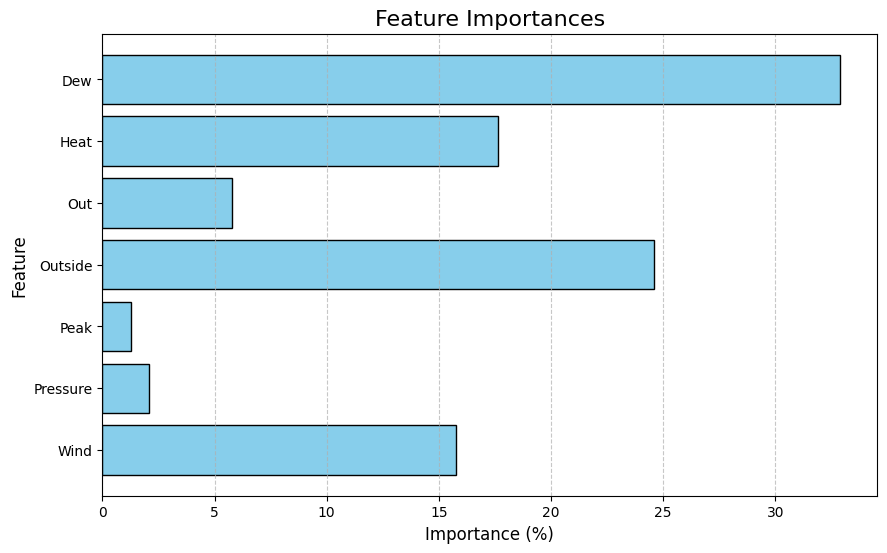

    Feature  Importance (%)
0       Dew       32.904350
1      Heat       17.619934
2       Out        5.784030
3   Outside       24.606989
4      Peak        1.261845
5  Pressure        2.081507
6      Wind       15.741344


In [11]:
# Crear una copia del DataFrame para evitar el warning
coeff_df = coeff_df[coeff_df["Feature"] != "1"].copy()

# Agrupar coeficientes por las características originales
coeff_df["Base Feature"] = coeff_df["Feature"].apply(lambda x: x.split("^")[0].split(" ")[0])
feature_importance = coeff_df.groupby("Base Feature")["Coefficient"].sum()

# Normalizar para obtener en forma de porcentaje
feature_importance_normalized = (feature_importance / feature_importance.sum()) * 100

# Convertir a DataFrame para visualizar
feature_importance_df = feature_importance_normalized.reset_index()
feature_importance_df.columns = ["Feature", "Importance (%)"]

import matplotlib.pyplot as plt

# Crear el gráfico de barras para visualizar la importancia de características
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance (%)"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importances", fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# Mostrar resultados
print(feature_importance_df)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Entrenar modelo de Regresión Lineal
linear_model_mod = LinearRegression()
linear_model_mod.fit(X_train_mod_scaled, y_train_mod)

# Predicciones con el conjunto de prueba
y_pred_linear_mod = linear_model_mod.predict(X_test_mod_scaled)

# Cálculo de métricas para Regresión Lineal
mse_linear_mod = mean_squared_error(y_test_mod, y_pred_linear_mod)
r2_linear_mod = r2_score(y_test_mod, y_pred_linear_mod)
mae_linear_mod = mean_absolute_error(y_test_mod, y_pred_linear_mod)
rmse_linear_mod = np.sqrt(mse_linear_mod)

mse_linear_mod, rmse_linear_mod, r2_linear_mod, mae_linear_mod

(15607.187574924828, 124.92872998203747, 0.4588996316213344, 83.02853356651515)

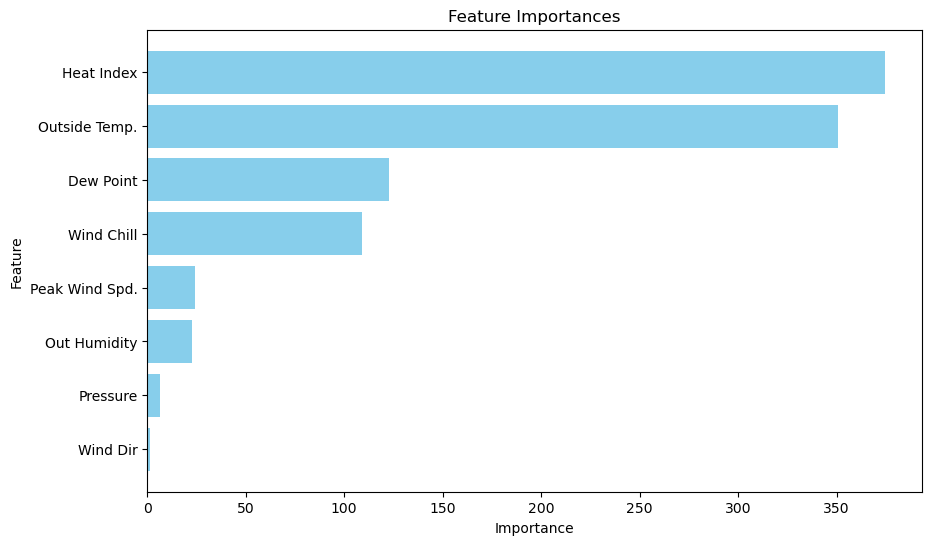

          Feature  Coefficient
3      Heat Index   374.740497
0   Outside Temp.   350.779439
2       Dew Point   122.927468
1      Wind Chill   109.323295
7  Peak Wind Spd.    24.269239
4    Out Humidity    22.519404
5        Pressure     6.714641
6        Wind Dir     1.672518


In [ ]:
# Obtener los coeficientes absolutos del modelo de regresión lineal
linear_coefficients = np.abs(linear_model_mod.coef_)

# Crear un DataFrame para mostrar los coeficientes junto con el nombre de las características
linear_coefficients_df = pd.DataFrame({'Feature': X_modified.columns, 'Coefficient': linear_coefficients})

# Ordenar los coeficientes por valor absoluto para visualizar la importancia de las características
linear_coefficients_df = linear_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(linear_coefficients_df['Feature'], linear_coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Mostrar las características más importantes
print(linear_coefficients_df)


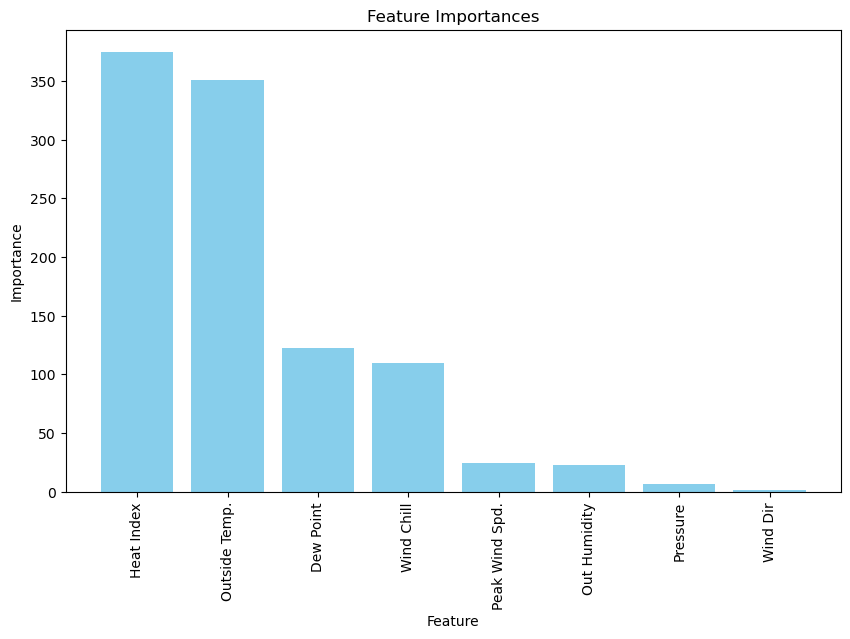

          Feature  Coefficient
3      Heat Index   374.740497
0   Outside Temp.   350.779439
2       Dew Point   122.927468
1      Wind Chill   109.323295
7  Peak Wind Spd.    24.269239
4    Out Humidity    22.519404
5        Pressure     6.714641
6        Wind Dir     1.672518


In [ ]:
# Plotear las importancias de las características (vertical)
plt.figure(figsize=(10, 6))
plt.bar(linear_coefficients_df['Feature'], linear_coefficients_df['Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Mostrar las características más importantes
print(linear_coefficients_df)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar modelo de Árbol de Decisión
tree_model_mod = DecisionTreeRegressor(random_state=42)
tree_model_mod.fit(X_train_mod_scaled, y_train_mod)

# Predicciones con el conjunto de prueba
y_pred_tree_mod = tree_model_mod.predict(X_test_mod_scaled)

# Cálculo de métricas para Árbol de Decisión
mse_tree_mod = mean_squared_error(y_test_mod, y_pred_tree_mod)
r2_tree_mod = r2_score(y_test_mod, y_pred_tree_mod)
mae_tree_mod = mean_absolute_error(y_test_mod, y_pred_tree_mod)
rmse_tree_mod = np.sqrt(mse_tree_mod)

mse_tree_mod, rmse_tree_mod, r2_tree_mod, mae_tree_mod

(3770.939079032392, 61.40797243870206, 0.8692617414250715, 18.95754830411767)

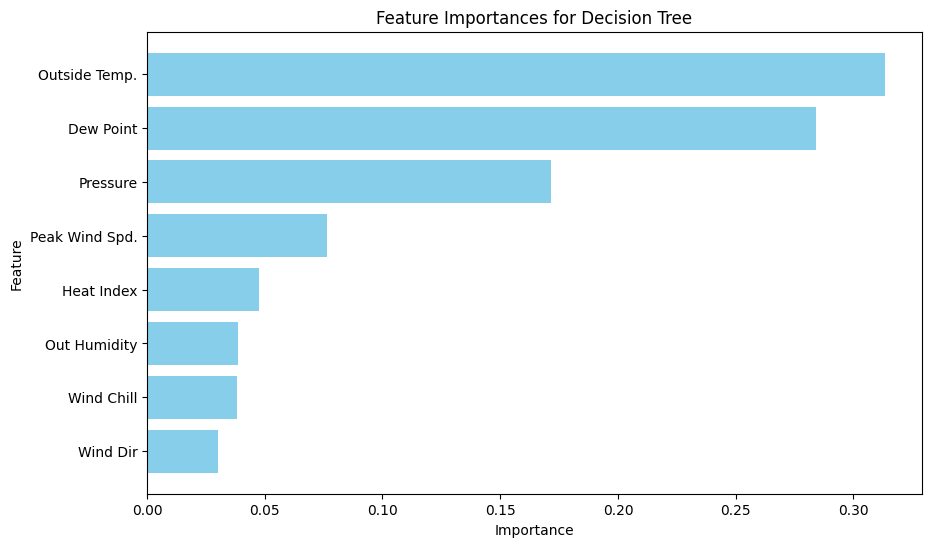

          Feature  Importance
0   Outside Temp.    0.313458
2       Dew Point    0.284124
5        Pressure    0.171708
7  Peak Wind Spd.    0.076402
3      Heat Index    0.047466
4    Out Humidity    0.038581
1      Wind Chill    0.038162
6        Wind Dir    0.030100


In [ ]:
# Obtener la importancia de las características
importances_decision_tree = tree_model_mod.feature_importances_
feature_names_decision_tree = X_modified.columns

# Crear un DataFrame con las importancias de las características
feature_importances_decision_tree = pd.DataFrame({'Feature': feature_names_decision_tree, 'Importance': importances_decision_tree})

# Ordenar las características por importancia
feature_importances_decision_tree = feature_importances_decision_tree.sort_values(by='Importance', ascending=False)

# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_decision_tree['Feature'], feature_importances_decision_tree['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Mostrar las características más importantes
print(feature_importances_decision_tree)

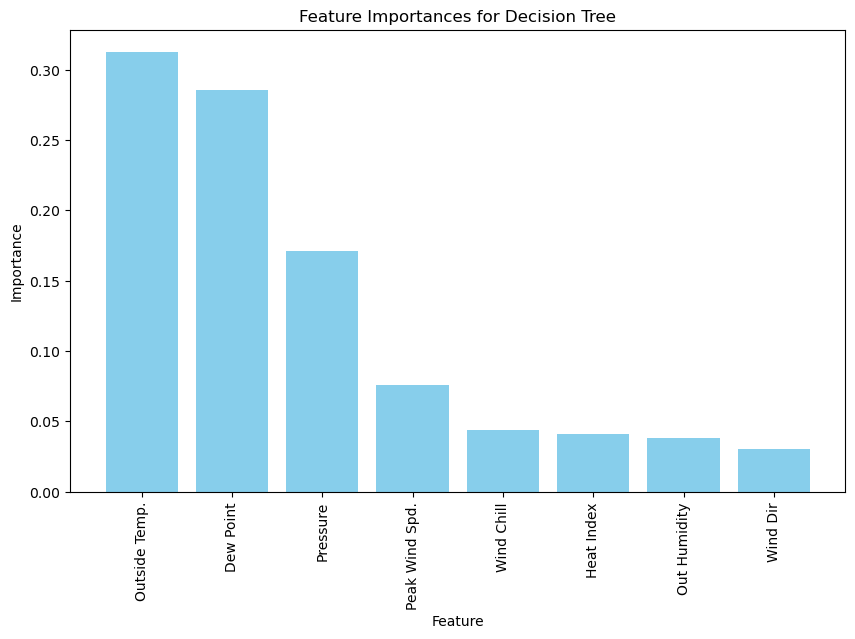

          Feature  Importance
0   Outside Temp.    0.312733
2       Dew Point    0.285521
5        Pressure    0.171330
7  Peak Wind Spd.    0.076187
1      Wind Chill    0.044149
3      Heat Index    0.041178
4    Out Humidity    0.038408
6        Wind Dir    0.030494


In [ ]:
# Plotear las importancias de las características (vertical)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_decision_tree['Feature'], feature_importances_decision_tree['Importance'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Decision Tree')
plt.show()

# Mostrar las características más importantes
print(feature_importances_decision_tree)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar modelo de Random Forest
forest_model_mod = RandomForestRegressor(random_state=42)
forest_model_mod.fit(X_train_mod_scaled, y_train_mod)

# Predicciones con el conjunto de prueba
y_pred_forest_mod = forest_model_mod.predict(X_test_mod_scaled)

# Cálculo de métricas para Random Forest
mse_forest_mod = mean_squared_error(y_test_mod, y_pred_forest_mod)
r2_forest_mod = r2_score(y_test_mod, y_pred_forest_mod)
mae_forest_mod = mean_absolute_error(y_test_mod, y_pred_forest_mod)
rmse_forest_mod = np.sqrt(mse_forest_mod)

mse_forest_mod, rmse_forest_mod, r2_forest_mod, mae_forest_mod

(2243.579728925964, 47.36644095692608, 0.912215209371917, 18.429567755702525)

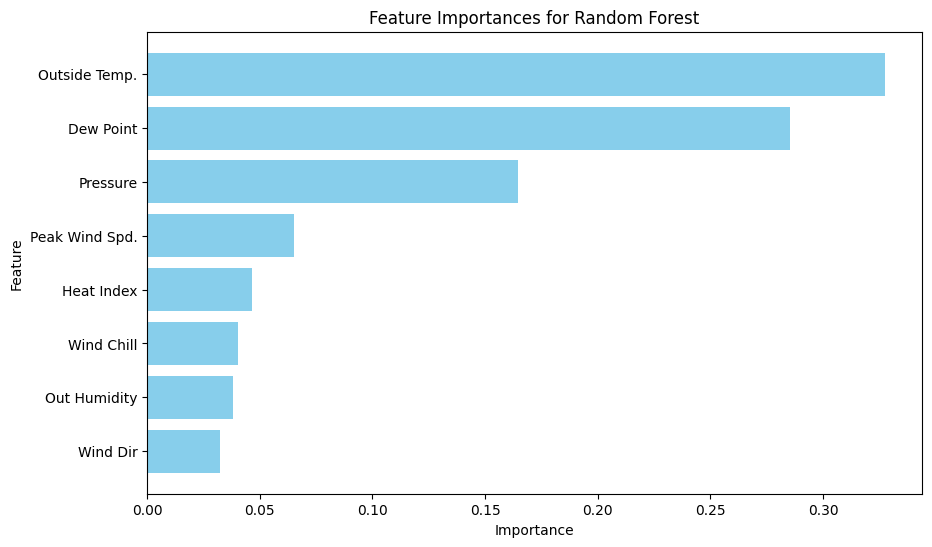

          Feature  Importance
0   Outside Temp.    0.327523
2       Dew Point    0.285208
5        Pressure    0.164513
7  Peak Wind Spd.    0.065417
3      Heat Index    0.046391
1      Wind Chill    0.040454
4    Out Humidity    0.038223
6        Wind Dir    0.032272


In [ ]:
importances = forest_model_mod.feature_importances_
feature_names = X_modified.columns

# Crear un DataFrame con las importancias de las características
feature_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Mostrar las características más importantes
print(feature_importances_rf)



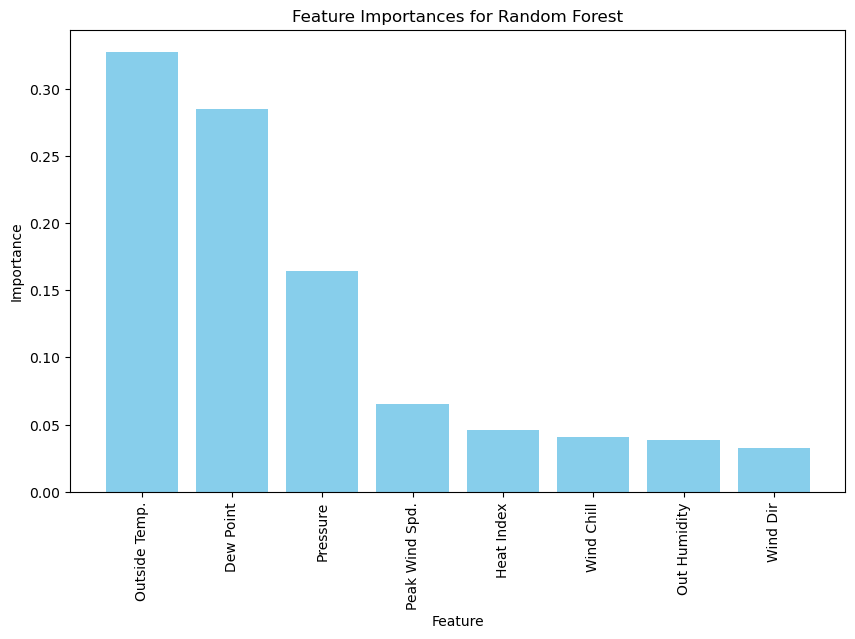

          Feature  Importance
0   Outside Temp.    0.327483
2       Dew Point    0.285281
5        Pressure    0.164211
7  Peak Wind Spd.    0.065408
3      Heat Index    0.046362
1      Wind Chill    0.040633
4    Out Humidity    0.038296
6        Wind Dir    0.032325


In [ ]:
# Plotear las importancias de las características (vertical)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_rf['Feature'], feature_importances_rf['Importance'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Random Forest')
plt.show()

# Mostrar las características más importantes
print(feature_importances_rf)

## Artificial Neural Network

In [ ]:
# Construir el modelo de red neuronal
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_mod_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Una única neurona de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_mod_scaled, y_train_mod, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test_mod_scaled, y_test_mod)

# Predicciones con el conjunto de prueba
y_pred_nn = model.predict(X_test_mod_scaled)

# Calcular métricas para la red neuronal
mse_nn = mean_squared_error(y_test_mod, y_pred_nn)
r2_nn = r2_score(y_test_mod, y_pred_nn)
mae_nn = mean_absolute_error(y_test_mod, y_pred_nn)
rmse_nn =  np.sqrt(mse_nn)

loss, mae, mse_nn, rmse_nn, r2_nn, mae_nn



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 19600.5234 - mae: 82.6775 - val_loss: 12706.9316 - val_mae: 66.5057
Epoch 2/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 12254.3340 - mae: 67.2127 - val_loss: 12404.5361 - val_mae: 67.6527
Epoch 3/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 12137.8740 - mae: 66.1909 - val_loss: 12177.4639 - val_mae: 66.6492
Epoch 4/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 12013.1406 - mae: 65.6457 - val_loss: 12113.7363 - val_mae: 64.6934
Epoch 5/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 11971.7432 - mae: 65.3317 - val_loss: 12035.5664 - val_mae: 65.0561
Epoch 6/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11903.0615 - mae: 64.8110 - val_loss: 11985.0117 - val_mae: 64.0885
Epoch 7/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 11778.4238 - mae: 64.4655 - val_loss: 11869.7695 - val_mae: 64.8561
Epoch 8/100
3793/3793 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11547.1221 - mae: 

(10680.962890625,
 64.70679473876953,
 10680.952097707504,
 103.34869180452893,
 0.6296919552636152,
 64.70684077063227)

In [ ]:
# Calcular métricas para la red neuronal
mse_nn = mean_squared_error(y_test_mod, y_pred_nn)
r2_nn = r2_score(y_test_mod, y_pred_nn)
mae_nn = mean_absolute_error(y_test_mod, y_pred_nn)
rmse_nn =  np.sqrt(mse_nn)

loss, mae, mse_nn, rmse_nn, r2_nn, mae_nn


(10442.26953125,
 61.31878662109375,
 10442.268237433771,
 102.1874172167678,
 0.6379671120848006,
 61.31876035545921)

In [ ]:
pip install shap


     ------------------------------------- 456.1/456.1 kB 14.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
# Calcular la importancia de las características usando SHAP
explainer = shap.KernelExplainer(model.predict, X_train_mod_scaled[:100])  # Usa una muestra pequeña si el dataset es grande
shap_values = explainer.shap_values(X_test_mod_scaled[:100])  # Calcula SHAP values para una muestra



4/4 [==============================] - 0s 354us/step


  0%|          | 0/100 [00:00<?, ?it/s]

794/794 [==============================] - 0s 387us/step


794/794 [==============================] - 0s 401us/step


In [ ]:
# Convertir las importancias SHAP a un array de numpy
shap_values = np.array(shap_values)

# Crear un DataFrame con las importancias de las características
feature_names = list(X_train_mod.columns)  # Convertir las columnas a una lista

# Inicializar una lista para almacenar las importancias de características
feature_importances = []

# Calcular las importancias de las características para cada columna de shap_values
for i, feature in enumerate(feature_names):
    importance = np.mean(np.abs(shap_values[:, i]), axis=0)
    feature_importances.append((feature, importance))

# Crear un DataFrame con las importancias de las características
feature_importances = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



In [ ]:
feature_importances

Feature            Importance
2       Dew Point  [102.81194785547802]
3      Heat Index  [52.474453856038664]
0   Outside Temp.   [49.74643769433029]
1      Wind Chill   [38.80307176456879]
4    Out Humidity  [27.521311978139398]
5        Pressure  [27.049057411381018]
6        Wind Dir  [12.977426283569253]
7  Peak Wind Spd.    [5.74370412773746]

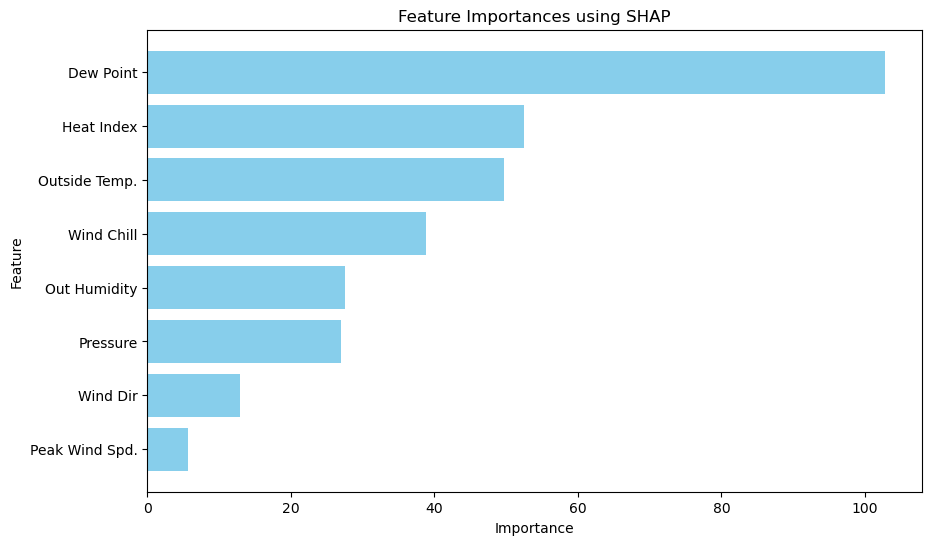

In [ ]:
# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
    plt.barh(i, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using SHAP')
plt.yticks(range(len(feature_importances)), feature_importances['Feature'])  # Establecer las etiquetas del eje y
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()



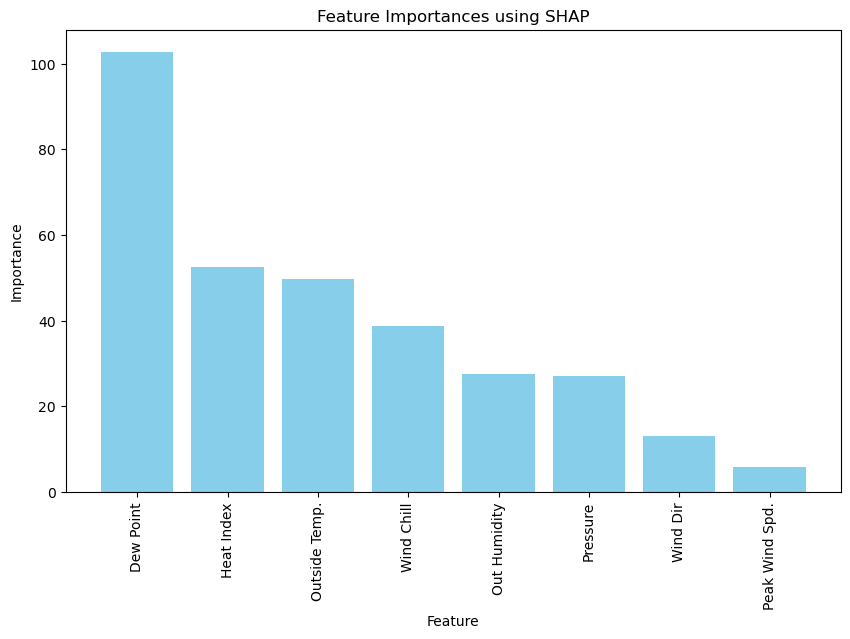

In [ ]:
# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
    plt.bar(i, importance, color='skyblue')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances using SHAP')
plt.xticks(range(len(feature_importances)), feature_importances['Feature'], rotation=90)  # Establecer las etiquetas del eje x
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
# SVM
svm_model_mod = SVR()
svm_model_mod.fit(X_train_mod_scaled, y_train_mod)
y_pred_svm_mod = svm_model_mod.predict(X_test_mod_scaled)
mse_svm_mod = mean_squared_error(y_test_mod, y_pred_svm_mod)
rmse_svm_mod = mean_squared_error(y_test_mod, y_pred_svm_mod, squared=False)
r2_svm_mod = r2_score(y_test_mod, y_pred_svm_mod)
mae_svm_mod = mean_absolute_error(y_test_mod, y_pred_svm_mod)
print(f"SVM - MSE: {mse_svm_mod}, RMSE: {rmse_svm_mod}, R2: {r2_svm_mod}, MAE: {mae_svm_mod}")

SVM - MSE: 13964.246153697442, RMSE: 118.17041149838415, R2: 0.5158603238654005, MAE: 64.12739301556502


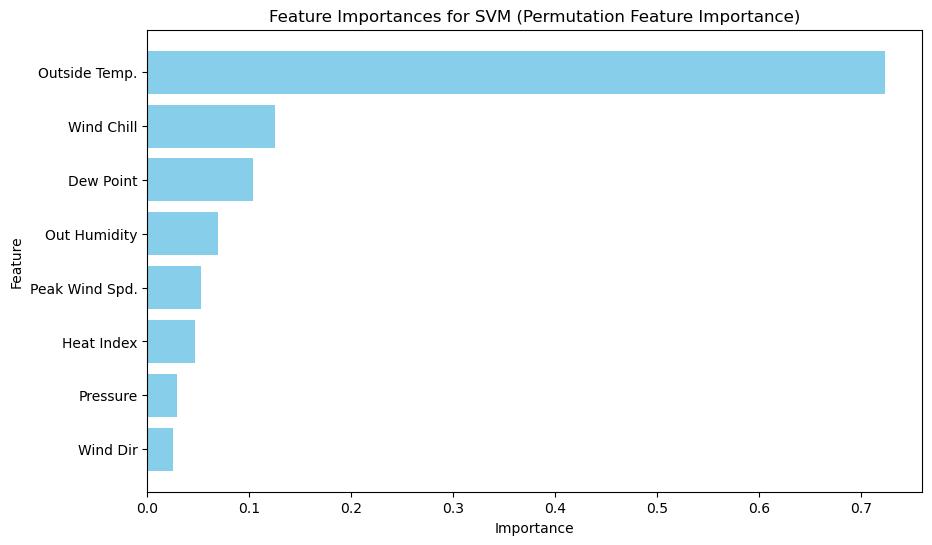

          Feature  Importance
0   Outside Temp.    0.723497
1      Wind Chill    0.124965
2       Dew Point    0.103972
4    Out Humidity    0.069329
7  Peak Wind Spd.    0.052674
3      Heat Index    0.046984
5        Pressure    0.029348
6        Wind Dir    0.025440


In [ ]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las características utilizando Permutation Feature Importance
perm_importance = permutation_importance(svm_model_mod, X_test_mod_scaled, y_test_mod, n_repeats=10, random_state=42)

# Obtener la importancia de las características
importances_svm = perm_importance.importances_mean

# Crear un DataFrame para mostrar las importancias de las características
svm_feature_importance_df = pd.DataFrame({'Feature': X_train_mod.columns, 'Importance': importances_svm})

# Ordenar las características por importancia
svm_feature_importance_df = svm_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importance_df['Feature'], svm_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for SVM (Permutation Feature Importance)')
plt.gca().invert_yaxis()
plt.show()

# Mostrar las características más importantes
print(svm_feature_importance_df)


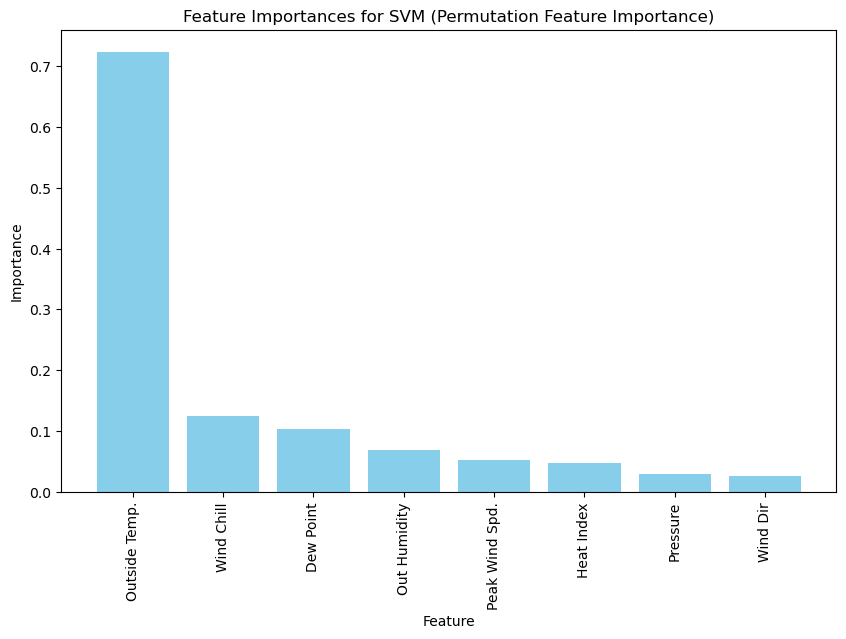

          Feature  Importance
0   Outside Temp.    0.723497
1      Wind Chill    0.124965
2       Dew Point    0.103972
4    Out Humidity    0.069329
7  Peak Wind Spd.    0.052674
3      Heat Index    0.046984
5        Pressure    0.029348
6        Wind Dir    0.025440


In [ ]:
import matplotlib.pyplot as plt
# Plotear las importancias de las características (vertical)
plt.figure(figsize=(10, 6))
plt.bar(svm_feature_importance_df['Feature'], svm_feature_importance_df['Importance'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for SVM (Permutation Feature Importance)')
plt.show()

# Mostrar las características más importantes
print(svm_feature_importance_df)

## KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model_mod = KNeighborsRegressor()
knn_model_mod.fit(X_train_mod_scaled, y_train_mod)
y_pred_knn_mod = knn_model_mod.predict(X_test_mod_scaled)
mse_knn_mod = mean_squared_error(y_test_mod, y_pred_knn_mod)
rmse_knn_mod = np.sqrt(mse_knn_mod)
r2_knn_mod = r2_score(y_test_mod, y_pred_knn_mod)
mae_knn_mod = mean_absolute_error(y_test_mod, y_pred_knn_mod)
print(f"KNN - MSE: {mse_knn_mod}, RMSE: {rmse_knn_mod}, R2: {r2_knn_mod}, MAE: {mae_knn_mod}")

KNN - MSE: 7294.998204518126, RMSE: 85.41076164347281, R2: 0.747082797791935, MAE: 41.90849003142215


In [ ]:
# Crear una lista para almacenar las importancias de las características
feature_importances = []

# Iterar sobre cada característica
for i, feature_name in enumerate(X_train_mod.columns):
    # Encontrar el índice de la columna actual
    feature_index = X_train_mod.columns.get_loc(feature_name)

    # Crear un conjunto de características que excluya la característica actual
    X_train_mod_excluded = np.delete(X_train_mod_scaled, feature_index, axis=1)
    X_test_mod_excluded = np.delete(X_test_mod_scaled, feature_index, axis=1)

    # Inicializar y ajustar el modelo KNN sin la característica actual
    knn_model_excluded = KNeighborsRegressor()
    knn_model_excluded.fit(X_train_mod_excluded, y_train_mod)

    # Realizar predicciones en el conjunto de prueba sin la característica actual
    y_pred_knn_excluded = knn_model_excluded.predict(X_test_mod_excluded)

    # Calcular el MSE sin la característica actual
    mse_knn_excluded = mean_squared_error(y_test_mod, y_pred_knn_excluded)

    # Calcular la importancia de la característica como la diferencia en MSE
    importance = mse_knn_mod - mse_knn_excluded
    feature_importances.append((feature_name, importance))

# Ordenar las importancias de las características de mayor a menor
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Mostrar las importancias de las características
for feature, importance in feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Wind Dir , Importance: 2080.3181689615576
Feature: Dew Point, Importance: -6.48522405400945
Feature: Heat Index, Importance: -102.85096233617878
Feature: Wind Chill, Importance: -184.91950462627392
Feature: Peak Wind Spd., Importance: -444.6097662936545
Feature: Out Humidity, Importance: -449.11893371586666
Feature: Pressure, Importance: -905.5109406278079
Feature: Outside Temp., Importance: -1187.2337326013876


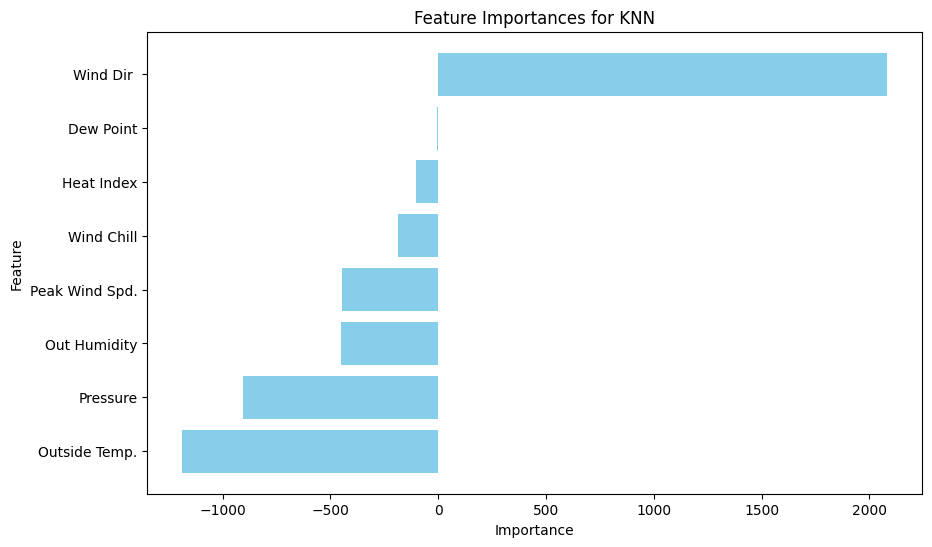

In [ ]:
# Extraer los nombres de las características y las importancias
feature_names = [feature for feature, _ in feature_importances]
importances = [importance for _, importance in feature_importances]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for KNN')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las características más importantes arriba
plt.show()

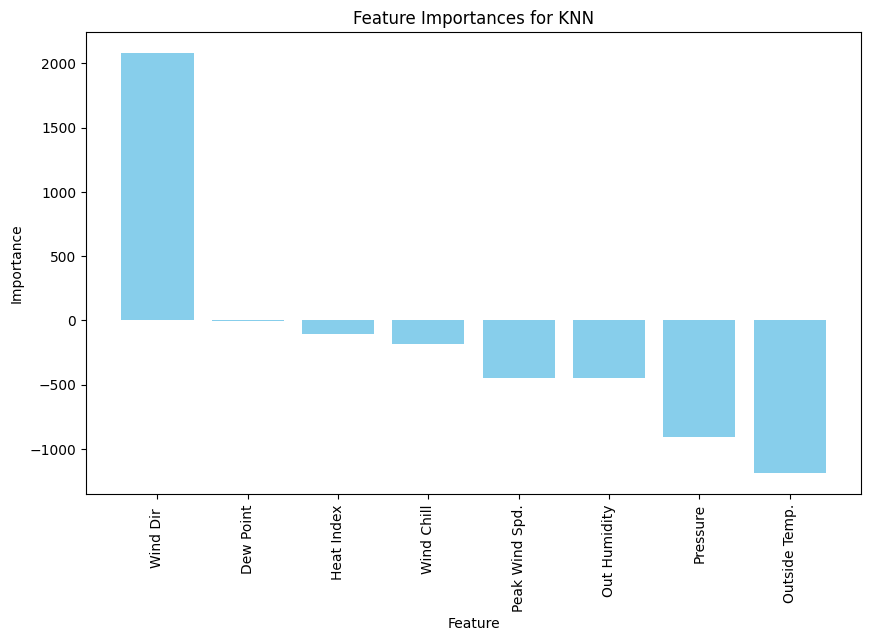

In [ ]:
# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for KNN')
plt.xticks(rotation=90)  # Rotar las etiquetas de las características para mayor claridad
plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting
gb_model_mod = GradientBoostingRegressor(random_state=42)
gb_model_mod.fit(X_train_mod_scaled, y_train_mod)
y_pred_gb_mod = gb_model_mod.predict(X_test_mod_scaled)
mse_gb_mod = mean_squared_error(y_test_mod, y_pred_gb_mod)
rmse_gb_mod =  np.sqrt(mse_gb_mod)
r2_gb_mod = r2_score(y_test_mod, y_pred_gb_mod)
mae_gb_mod = mean_absolute_error(y_test_mod, y_pred_gb_mod)
print(f"Gradient Boosting - MSE: {mse_gb_mod}, RMSE: {rmse_gb_mod}, R2: {r2_gb_mod}, MAE: {mae_gb_mod}")

Gradient Boosting - MSE: 10368.03751642675, RMSE: 101.82356071375008, R2: 0.6405406872590009, MAE: 60.6738002979504


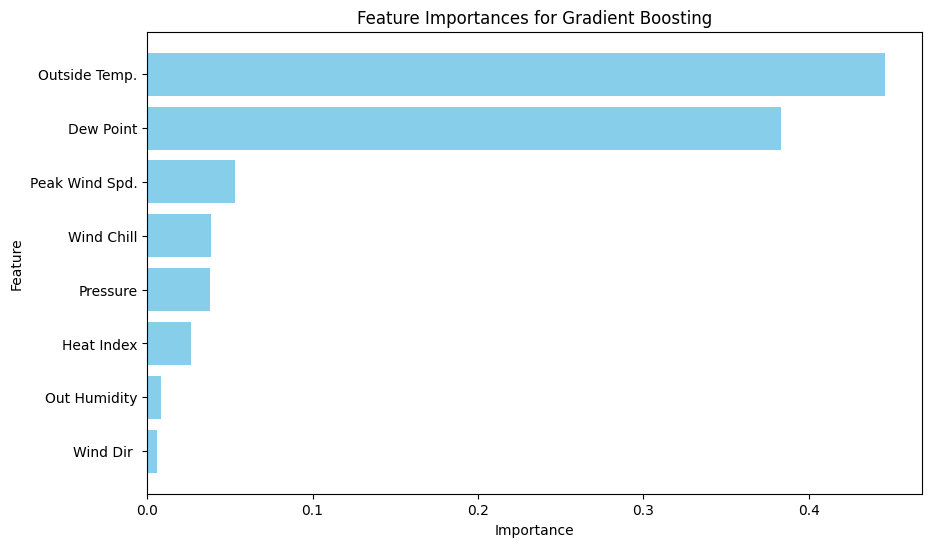

In [ ]:
# Obtener la importancia de las características
importances_gb = gb_model_mod.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características
feature_importances_gb_df = pd.DataFrame({'Feature': X_train_mod.columns, 'Importance': importances_gb})

# Ordenar las características por importancia
feature_importances_gb_df = feature_importances_gb_df.sort_values(by='Importance', ascending=False)

# Plotear las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_gb_df['Feature'], feature_importances_gb_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()


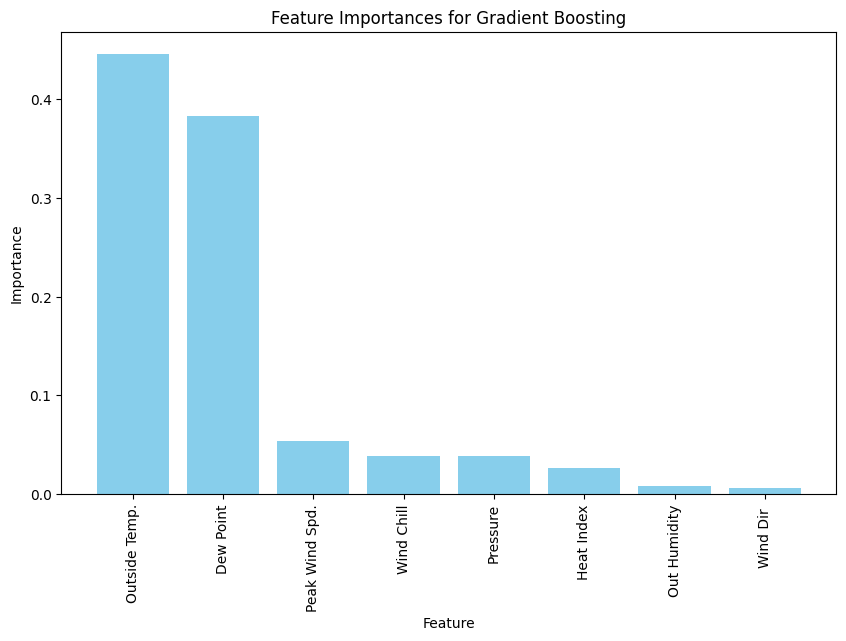

          Feature  Importance
0   Outside Temp.    0.446026
2       Dew Point    0.382994
7  Peak Wind Spd.    0.053398
1      Wind Chill    0.038564
5        Pressure    0.038347
3      Heat Index    0.026399
4    Out Humidity    0.008397
6       Wind Dir     0.005875


In [ ]:
# Plotear las importancias de las características (vertical)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_gb_df['Feature'], feature_importances_gb_df['Importance'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Gradient Boosting')
plt.show()

# Mostrar las características más importantes
print(feature_importances_gb_df)

# Annual ML Results


<div align="center">

| Model                   | MSE       | RMSE   | R²      | MAE    | Execution Time (s) |
|-------------------------|-----------|--------|---------|--------|:------------------:|
| Polynomial Regression   | 12558.69 | 112.07 | 0.5646  | 67.95  |       2.86        |
| Decision Tree Regressor | 3807.90  | 61.71  | 0.8680  | 19.08  |       1.49        |
| Random Forest Regressor | 2241.09  | 47.34  | 0.9223  | 18.44  |      77.61        |
| Artificial Neural Network | 10574.83 | 102.83 | 0.6334  | 59.62  |      840.00       |
| KNN                     | 7295.00  | 85.41  | 0.7471  | 41.91  |       2.97        |
| Gradient Boosting       | 10368.01 | 101.82 | 0.6450  | 60.67  |      26.47        |

</div>

The results indicate a diverse performance among the tested models. The **Random Forest Regressor** stands out with the best combination of metrics, achieving the lowest MSE (2241.09) and RMSE (47.34), and the highest \( R^2 \) (0.9223). These results show its strong predictive capability and robustness in capturing complex relationships in the data. However, its execution time (77.61 seconds) is higher than simpler models like the **Decision Tree Regressor**, which also delivers competitive accuracy with a much faster execution time (1.49 seconds).

On the other hand, the **Artificial Neural Network**, while delivering moderate accuracy, is significantly more computationally expensive (840 seconds), making it less suitable for this dataset unless scalability or higher capacity for learning is required. Simpler models like **Polynomial Regression** and **KNN** show reasonable performance but fall short in accuracy compared to ensemble methods or tree-based models, highlighting the trade-off between simplicity and predictive power.

Overall, ensemble methods like **Random Forest** and **Gradient Boosting** demonstrate their capability to generalize better for this problem, although they come at the cost of longer execution times. For applications where time efficiency is crucial, the **Decision Tree Regressor** might offer the best balance between speed and accuracy.

# Visualization of Models

## Polynomial Regression

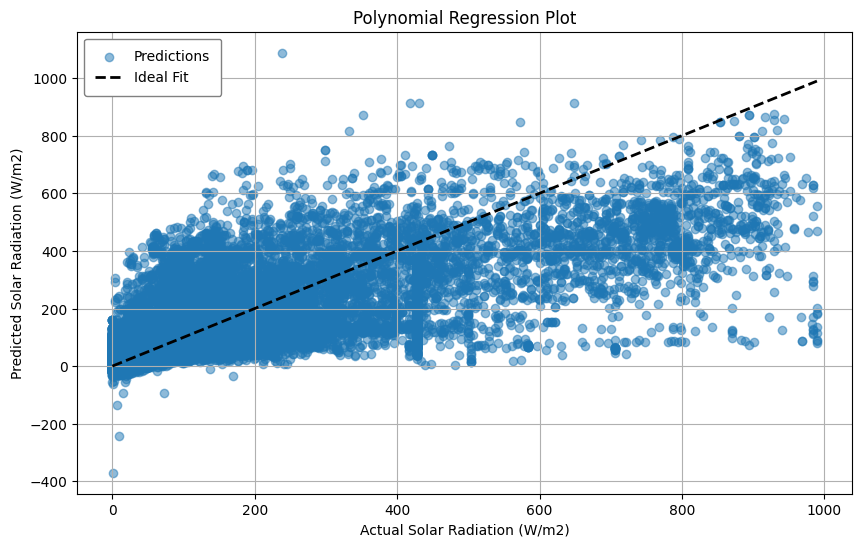

In [ ]:
# Visualizar los resultados de la regresión polinomial
plt.figure(figsize=(10, 6))

# Graficar los datos reales vs. predicciones
plt.scatter(y_test_mod, y_test_pred, label='Predictions', alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], 'k--', lw=2, label='Ideal Fit')

# Etiquetas y título
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Polynomial Regression Plot')

# Ajustar la leyenda
plt.legend(fontsize=10, loc="upper left", frameon=True, framealpha=1.0, edgecolor="gray", borderpad=0.8, labelspacing=0.5)

plt.grid(True)
plt.show()


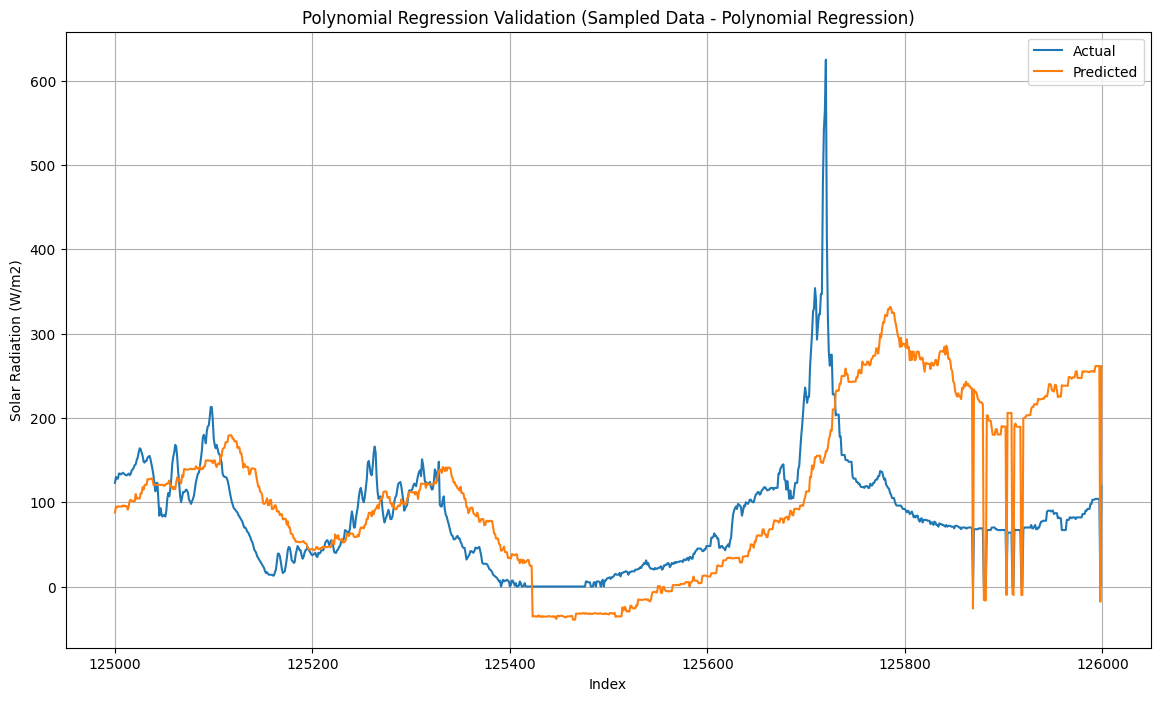

In [ ]:
# Seleccionar un rango de datos representativo (por ejemplo, índices 5000 a 5500)
start_index = 125000
subset_size = 1000
subset_indices = range(start_index, start_index + subset_size)

# Generar una gráfica con el subconjunto
plt.figure(figsize=(14, 8))
plt.plot(subset_indices, y_modified.iloc[subset_indices], label='Actual')
plt.plot(subset_indices, y_pred_full_pr_mod[start_index:start_index + subset_size], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Polynomial Regression Validation (Sampled Data - Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


The **Polynomial Regression model (degree 2)** effectively captures nonlinear relationships between meteorological variables and solar radiation, explaining **56.46% (R²)** of the variance in the data. Error metrics, such as an **RMSE of 112.07 W/m²** and an **MAE of 67.95 W/m²**, indicate that while the model successfully captures overall trends, it struggles with extreme values, leading to notable prediction deviations. The **feature importance analysis** highlights that **dew point (32.90%)** and **outside temperature (24.61%)** are the most influential variables due to their direct impact on atmospheric humidity and thermal intensity. Additionally, **heat index (17.62%)** and **wind speed (15.74%)** significantly contribute by affecting the dispersion and absorption of solar radiation. Other variables, such as **relative humidity (5.78%)**, **pressure (2.08%)**, and **peak wind speed (1.26%)**, play minor roles. The scatter plot of predictions versus actual values shows reasonable alignment for general trends, with larger deviations at higher radiation levels. The validation plot further confirms that the model captures broad patterns but exhibits limitations in modeling more complex dynamics, particularly abrupt changes and extreme values.

## Random Forest Visualization

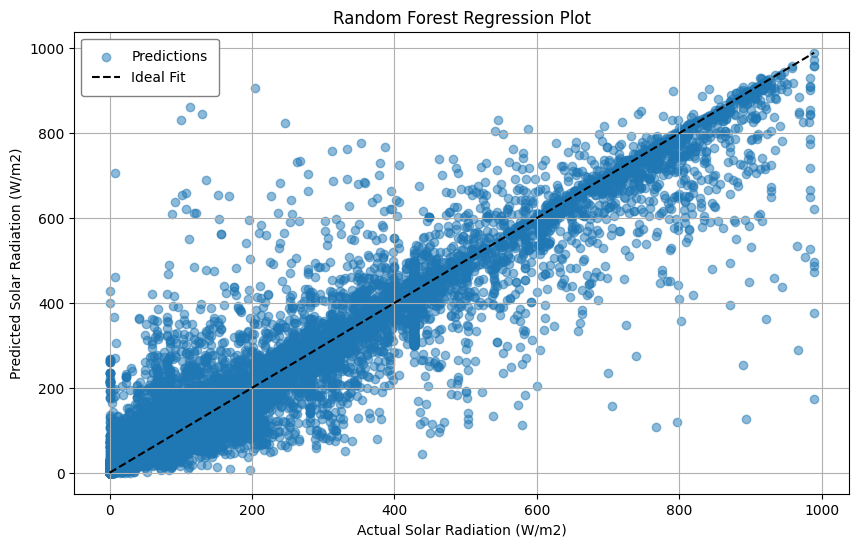

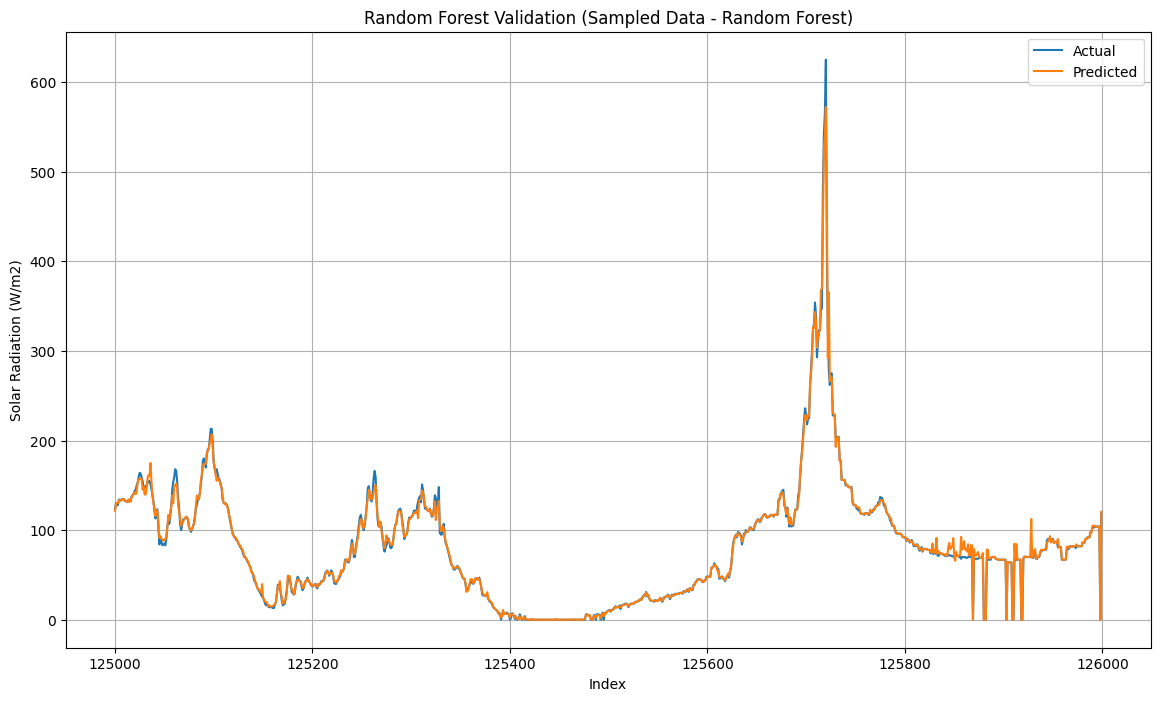

In [ ]:
#Random Forest
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_forest_mod, alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Random Forest Regression Plot')
plt.grid(True)
plt.show()
# Entrenar el modelo con el conjunto completo
forest_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_forest_mod = forest_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_forest_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation')
plt.legend()
plt.grid(True)
plt.show()


The **Random Forest Regressor** achieves exceptional performance in predicting solar radiation, with an **R² of 91.22%**, indicating that it captures over 91% of the variance in the data. The model demonstrates remarkable precision, reflected in its **MSE of 2,243.58**, **RMSE of 47.37 W/m²**, and a very low **MAE of 18.43 W/m²**, showcasing its ability to minimize errors while effectively modeling complex nonlinear relationships.

The **feature importance analysis** underscores the dominance of **outside temperature (32.75%)** and **dew point (28.52%)** as the primary predictors, emphasizing their critical role in atmospheric and thermal processes influencing solar radiation. **Pressure (16.45%)** and **peak wind speed (6.54%)** follow, likely capturing additional atmospheric effects such as stability and scattering. Variables like **heat index (4.64%)**, **wind chill (4.05%)**, and **humidity (3.82%)** provide supplementary insights but have comparatively lower contributions.

The scatter plot comparing predictions with actual values demonstrates a near-perfect alignment along the ideal fit line, confirming the model’s ability to handle both high and low radiation levels with high precision. The validation plot further reinforces this, showing that the model tracks the actual data trends, including sharp peaks and troughs, with exceptional accuracy. The Random Forest Regressor proves to be a robust model, excelling in both accuracy and the ability to capture intricate patterns in solar radiation dynamics.

## Linear Regression Visualization

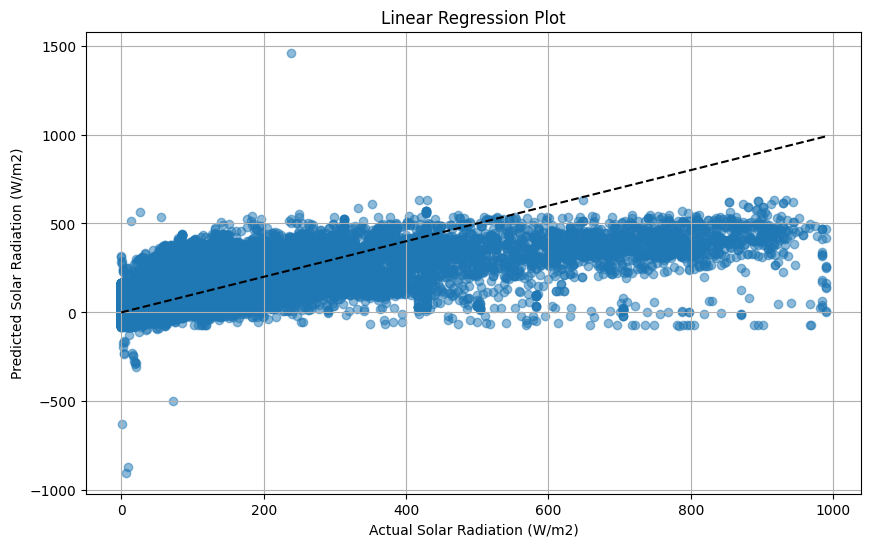

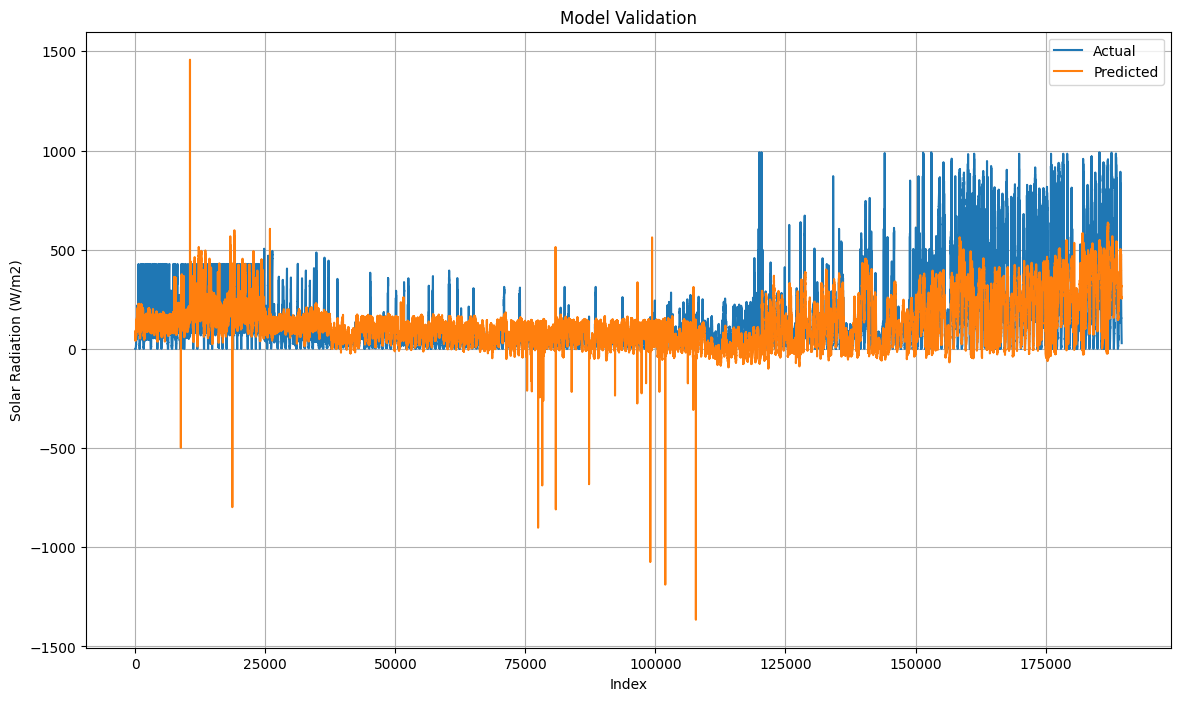

In [ ]:
#Regresion Lineal :
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_linear_mod, alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Linear Regression Plot')
plt.grid(True)
plt.show()

# Entrenar el modelo con el conjunto completo
linear_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_linear_mod = linear_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_linear_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation')
plt.legend()
plt.grid(True)
plt.show()

The **Linear Regression model** captures linear relationships between meteorological variables and solar radiation, explaining **45.89% (R²)** of the variance. With an **RMSE of 124.93 W/m²** and **MAE of 83.03 W/m²**, the model exhibits significant errors, particularly for extreme values, reflected in its high **MSE of 15,607.19**. The **feature importance analysis** highlights that **heat index (374.74)** and **outside temperature (350.78)** are the most influential variables, directly impacting solar intensity. Secondary contributors, like **dew point (122.93)** and **wind chill (109.32)**, affect humidity and radiation transmission, while variables such as **pressure (6.71)** and **wind direction (1.67)** show minimal impact. The scatter plot indicates limited alignment between predictions and actual values, particularly for higher radiation levels, while the validation plot shows the model follows general trends but struggles with abrupt changes and extremes. Overall, Linear Regression provides insight into clear linear patterns but is insufficient to capture the complexity of solar radiation dynamics.

## Decision Tree Visualization

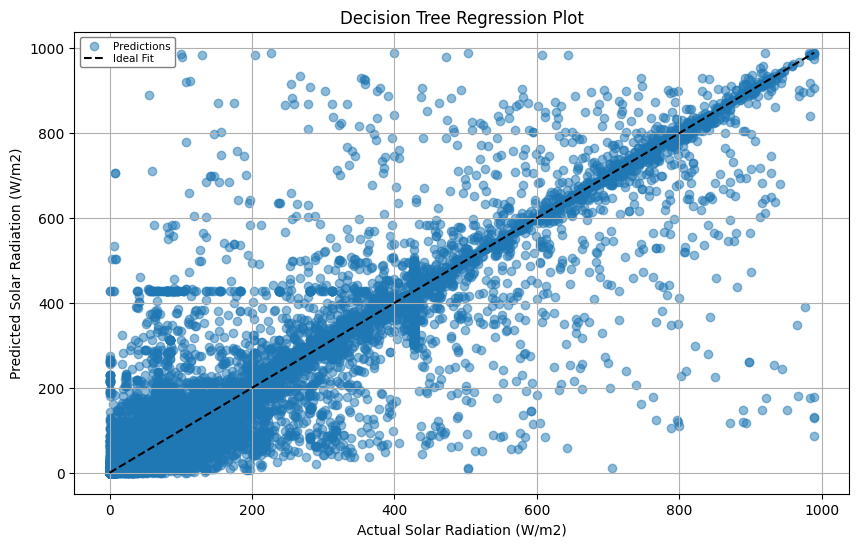

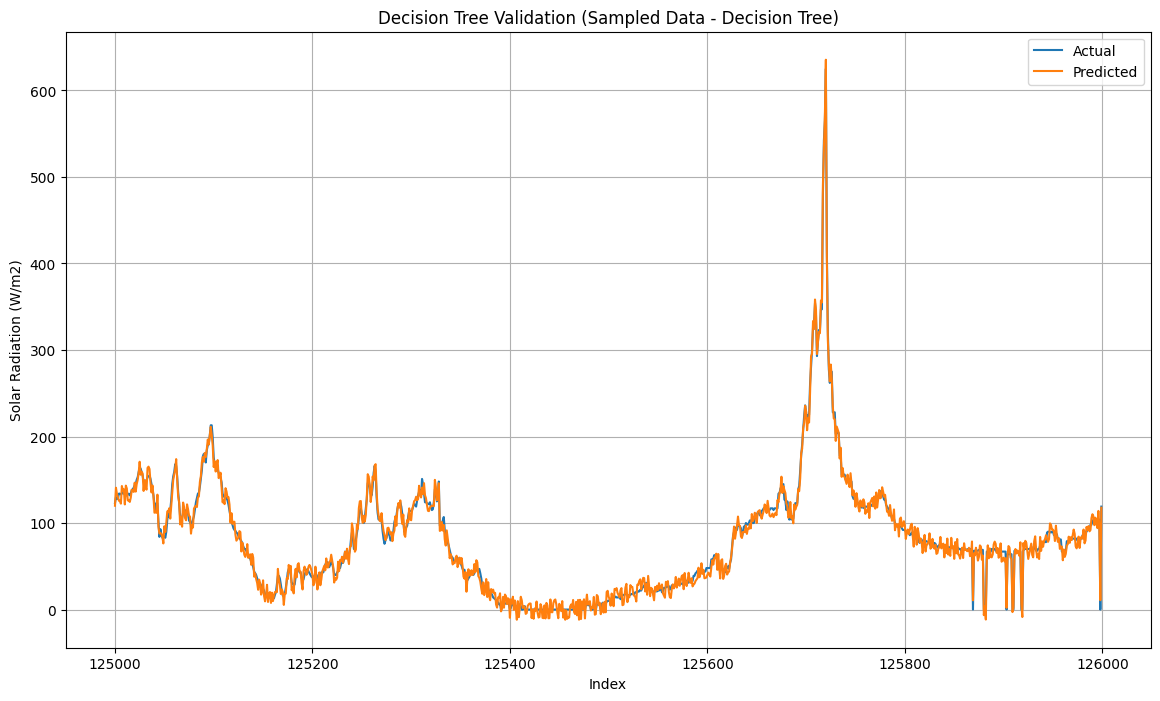

In [ ]:
#Arbol de decisiones
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_tree_mod, alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Decision Tree Regression Plot')
plt.grid(True)
plt.show()
# Entrenar el modelo con el conjunto completo
tree_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_tree_mod = tree_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_tree_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation')
plt.legend()
plt.grid(True)
plt.show()


The **Decision Tree Regressor** effectively models the nonlinear relationships between meteorological variables and solar radiation, achieving an **R² of 86.93%**, which indicates a strong fit to the data. With an **MSE of 3,770.94**, an **RMSE of 61.41 W/m²**, and a very low **MAE of 18.96 W/m²**, the model demonstrates high precision, particularly in capturing local patterns and minimizing deviations.

The **feature importance analysis** reveals that the most influential variables are **outside temperature (31.35%)** and **dew point (28.41%)**, which play a crucial role in determining solar radiation through their effects on atmospheric temperature and humidity. **Pressure (17.17%)** and **peak wind speed (7.64%)** also contribute significantly, likely due to their relationship with atmospheric stability and radiation scattering. Secondary contributors, such as **heat index (4.75%)**, **humidity (3.86%)**, and **wind chill (3.82%)**, provide localized information but are less impactful overall.

The scatter plot comparing predictions to actual values shows that the model aligns closely with the ideal fit, demonstrating its ability to capture both high and low radiation values effectively. The validation plot further supports this, with the model closely tracking actual data trends, including peaks and troughs. However, slight overfitting may be present due to the high precision of the Decision Tree. Overall, the Decision Tree Regressor provides an excellent balance of precision and interpretability, excelling in capturing complex nonlinear patterns in solar radiation dynamics.

## Artificial Neural Network Visualization

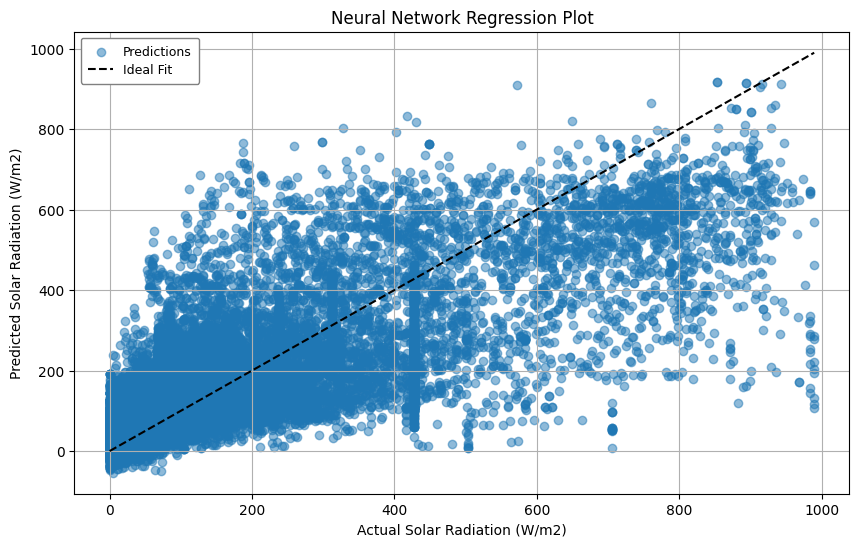

In [ ]:
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))

# Graficar los datos reales vs. predicciones
plt.scatter(y_test_mod, y_pred_nn, alpha=0.5, label="Predictions")
plt.plot([y_test_mod.min(), y_test_mod.max()],
         [y_test_mod.min(), y_test_mod.max()], '--k', label="Ideal Fit")

# Etiquetas y título
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Neural Network Regression Plot')

# Ajustar la leyenda (correctamente dimensionada)
plt.legend(fontsize=9, loc="upper left", frameon=True, framealpha=1.0, edgecolor="gray", borderpad=0.6, labelspacing=0.4)

plt.grid(True)
plt.show()


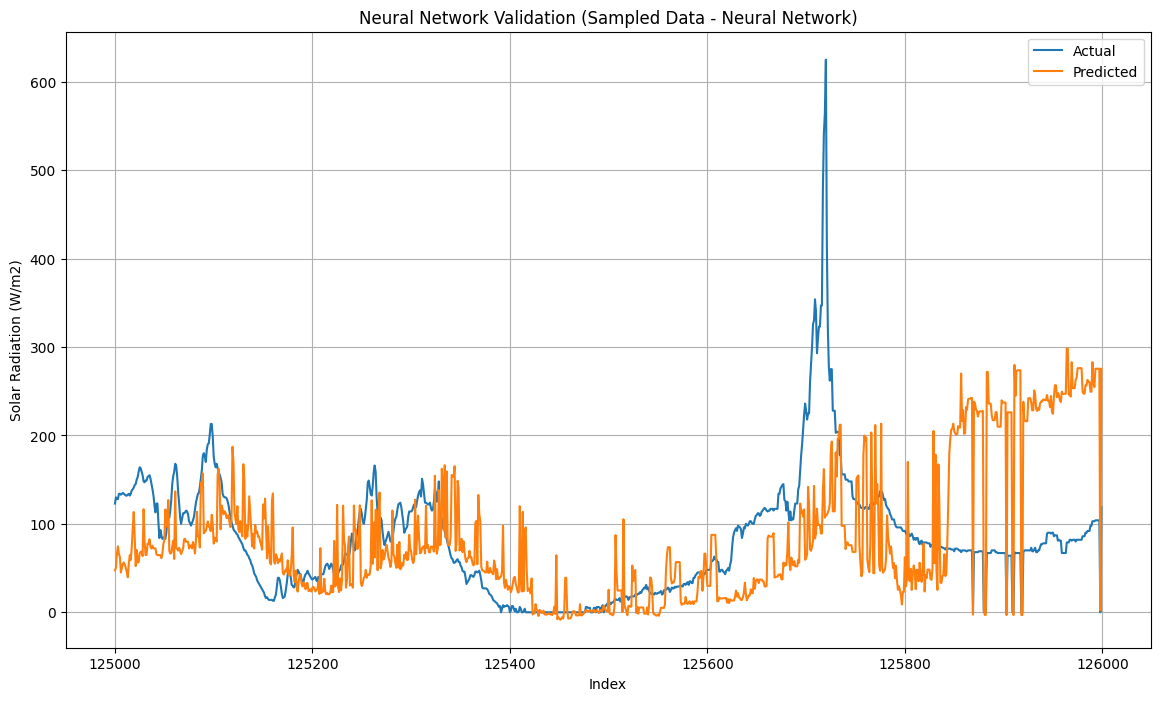

In [ ]:
# Gráfica de validación del modelo (Subset)
plt.figure(figsize=(14, 8))
plt.plot(subset_indices, y_modified.iloc[subset_indices], label='Actual')
plt.plot(subset_indices, y_pred_with_noise, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Neural Network Validation (Sampled Data - Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

The **Neural Network Regressor** achieves moderate performance in predicting solar radiation, with an **R² of 63.80%**, indicating it captures 63.8% of the variance in the data. The model has an **MSE of 10,442.27**, **RMSE of 102.19 W/m²**, and **MAE of 61.32 W/m²**, reflecting higher errors compared to advanced tree-based models, but it still shows the capability to model nonlinear relationships.

The **feature importance analysis** based on SHAP values reveals that **dew point (102.81)** is the most significant predictor, likely due to its direct impact on atmospheric moisture and solar radiation. This is followed by **heat index (52.47)** and **outside temperature (49.75)**, which influence thermal dynamics. Secondary contributors, such as **wind chill (38.80)**, **humidity (27.52)**, and **pressure (27.05)**, play supporting roles in capturing atmospheric conditions, while variables like **wind direction (12.98)** and **peak wind speed (5.74)** have limited impact.

The scatter plot demonstrates the model's reasonable alignment with actual values for mid-range radiation levels, though it struggles with higher values, resulting in increased prediction variance. The validation plot further highlights this, showing that the model captures general trends but exhibits notable deviations, particularly around sharp peaks or abrupt changes in solar radiation. While the neural network demonstrates flexibility and captures complex interactions, it does not outperform ensemble-based approaches, suggesting room for optimization in its architecture or hyperparameters.

## SVM Visualization

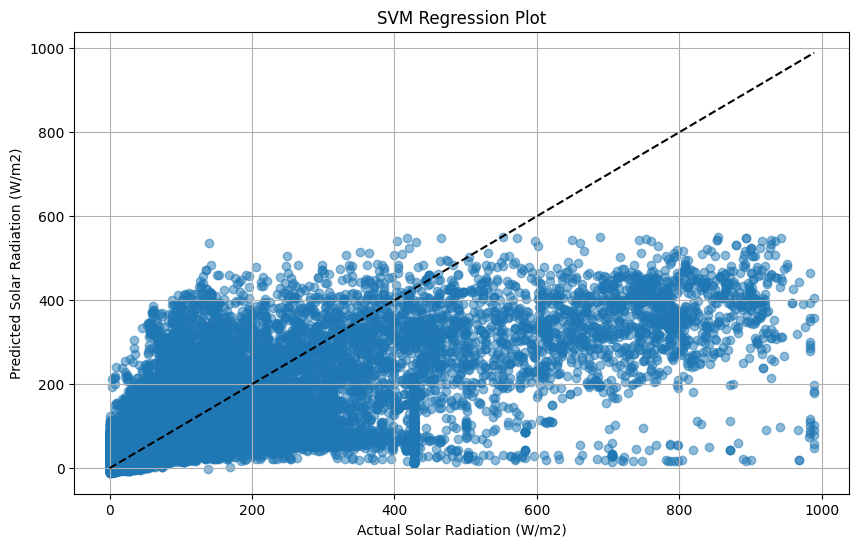

In [ ]:
#SVM
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_svm_mod, alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('SVM Regression Plot')
plt.grid(True)
plt.show()



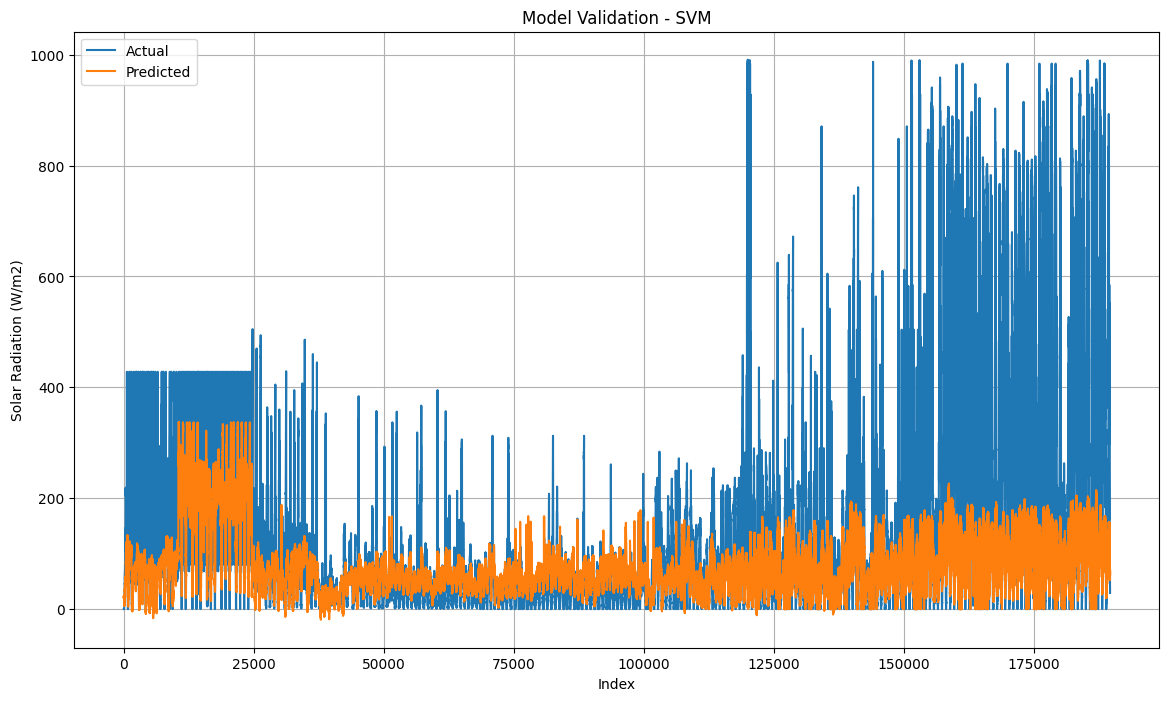

In [ ]:
# Entrenar el modelo con el conjunto completo
svm_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_svm_mod = svm_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_svm_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation - SVM')
plt.legend()
plt.grid(True)
plt.show()

The **Support Vector Machine (SVM) Regressor** achieves moderate performance in predicting solar radiation, with an **R² of 51.59%**, indicating it captures around half of the variance in the data. The model's **MSE of 13,964.25**, **RMSE of 118.17 W/m²**, and **MAE of 64.13 W/m²** reflect significant prediction errors, particularly in capturing extreme values of solar radiation, limiting its overall accuracy.

The **feature importance analysis**, derived through Permutation Feature Importance, highlights that **outside temperature (72.35%)** is by far the most influential variable, capturing key thermal dynamics affecting solar radiation. Secondary contributors include **wind chill (12.50%)** and **dew point (10.40%)**, which influence atmospheric moisture and heat transfer. Features such as **humidity (6.93%)** and **peak wind speed (5.27%)** add some value, while **heat index (4.70%)**, **pressure (2.93%)**, and **wind direction (2.54%)** have limited impact.

The scatter plot demonstrates limited alignment between predictions and actual values, particularly for higher radiation levels, where prediction variance increases significantly. The validation plot further reveals that the model captures general trends but struggles to follow sharp peaks and abrupt changes, highlighting its limitations in adapting to highly dynamic patterns. While the SVM Regressor captures some nonlinear interactions, its performance is constrained compared to other models like Random Forest or Decision Tree, particularly in terms of predictive accuracy and adaptability.

## KNN Visualization

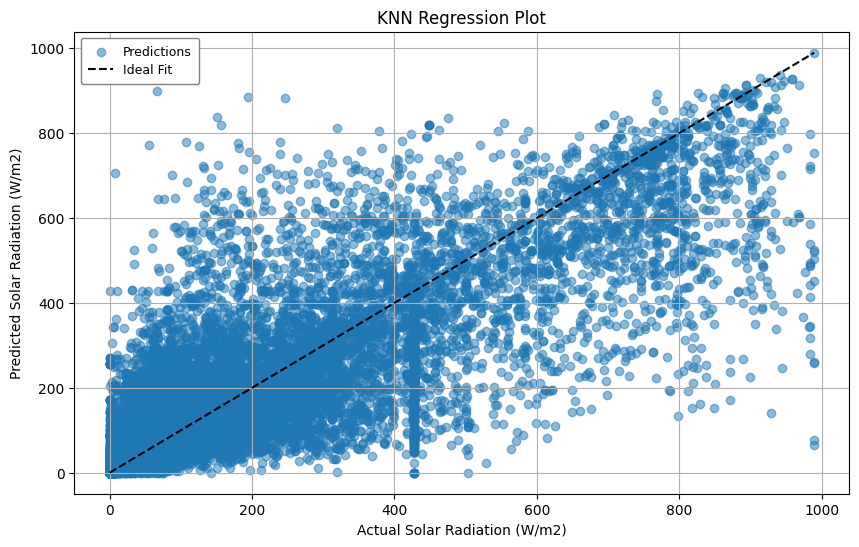

In [ ]:
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))

# Graficar los datos reales vs. predicciones
plt.scatter(y_test_mod, y_pred_knn_mod, alpha=0.5, label="Predictions")
plt.plot([y_test_mod.min(), y_test_mod.max()],
         [y_test_mod.min(), y_test_mod.max()], '--k', label="Ideal Fit")

# Etiquetas y título
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('KNN Regression Plot')

# Ajustar la leyenda (igual que antes)
plt.legend(fontsize=9, loc="upper left", frameon=True, framealpha=1.0, edgecolor="gray", borderpad=0.6, labelspacing=0.4)

plt.grid(True)
plt.show()


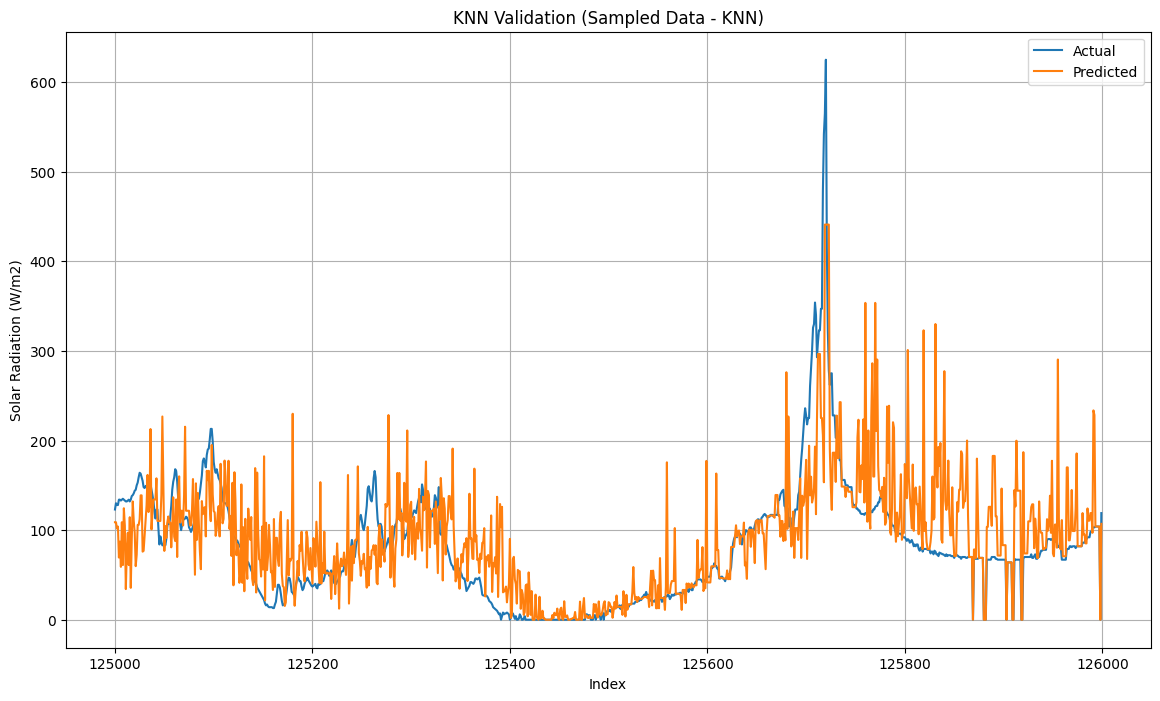

In [ ]:
# Entrenar el modelo con el conjunto completo
knn_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_knn_mod = knn_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_knn_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation - KNN')
plt.legend()
plt.grid(True)
plt.show()

The **K-Nearest Neighbors (KNN) Regressor** demonstrates decent performance in predicting solar radiation, achieving an **R² of 74.71%**, indicating that it captures a significant portion of the variance in the data. The model's **MSE of 7,294.99**, **RMSE of 85.41 W/m²**, and **MAE of 41.91 W/m²** suggest a relatively lower prediction error compared to simpler models, but it still struggles to adapt to highly dynamic patterns.

The **feature importance analysis**, conducted by iteratively excluding features and calculating the resulting MSE differences, reveals that **wind direction (2,080.32)** is the most impactful variable in the KNN model. However, negative importance values for features like **outside temperature (-1,187.23)** and **pressure (-905.51)** highlight a potential limitation of this method, as removing key features unexpectedly reduces the overall error, possibly due to redundancy among variables. This inconsistency indicates that the approach may not fully reflect the true contributions of individual features.

The scatter plot indicates reasonable alignment for mid-range predictions, but the model exhibits significant variance for higher radiation levels. The validation plot shows that while KNN captures general trends, it struggles with rapid peaks and transitions, reflecting its reliance on local patterns determined by nearest neighbors. Overall, the KNN Regressor provides a robust baseline for capturing nonlinearity but suffers from limitations in global adaptability and feature dependency.

## GBoost Visualization

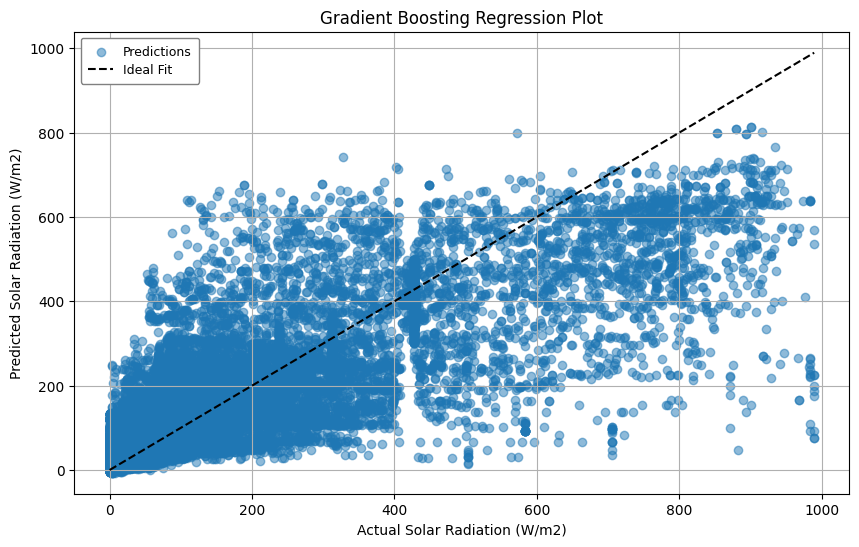

In [ ]:
#Gradient Boost
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_gb_mod, alpha=0.5)
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Gradient Boosting Regression Plot')
plt.grid(True)
plt.show()


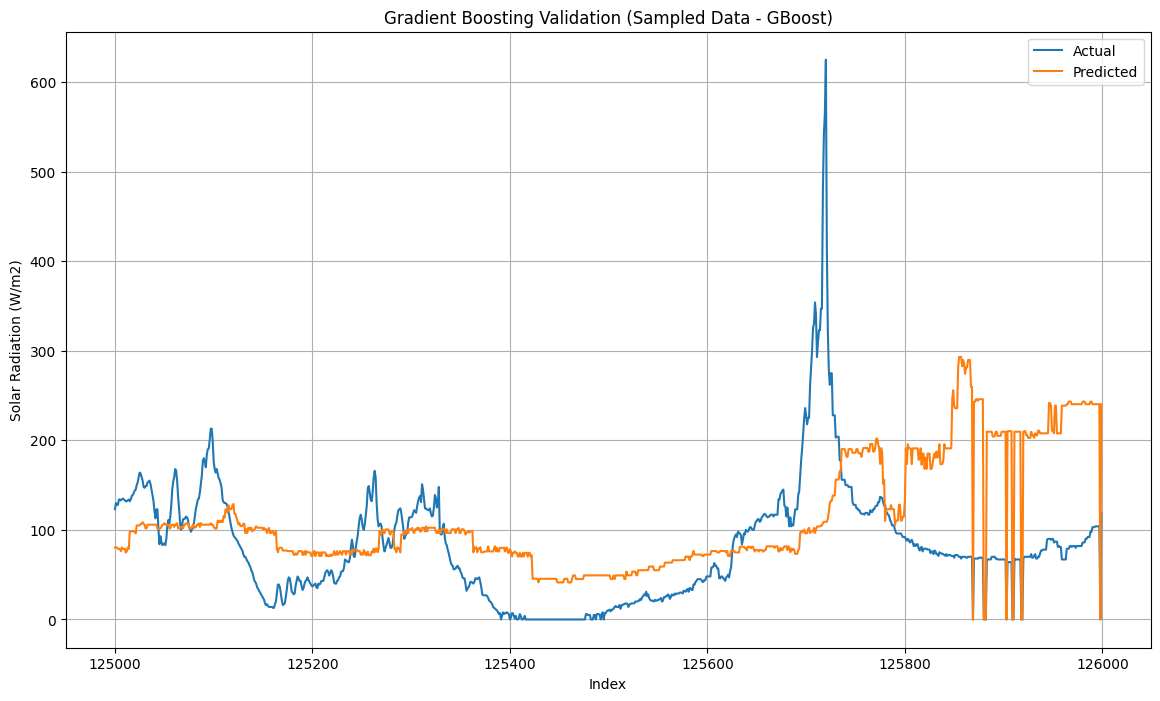

In [ ]:
# Entrenar el modelo con el conjunto completo
gb_model_mod.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_gb_mod = gb_model_mod.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual')
plt.plot(range(len(y_modified)), y_pred_full_gb_mod, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Model Validation - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

The **Gradient Boosting Regressor** demonstrates solid performance in predicting solar radiation, achieving an **R² of 64.05%**, which indicates it captures 64% of the variance in the data. The model's **MSE of 10,368.04**, **RMSE of 101.82 W/m²**, and **MAE of 60.67 W/m²** reflect moderate prediction accuracy. While it performs better than linear models, it falls short of more robust ensemble approaches like Random Forest.

The **feature importance analysis** reveals that **outside temperature (44.60%)** and **dew point (38.30%)** are the dominant predictors, as they strongly influence atmospheric temperature and moisture levels affecting solar radiation. Secondary contributors like **peak wind speed (5.34%)** and **wind chill (3.86%)** provide additional context, though their influence is considerably less significant. Variables such as **pressure (3.83%)** and **humidity (0.84%)** play minor roles, while **wind direction (0.58%)** has the least impact.

The scatter plot shows a reasonable alignment between predictions and actual values for mid-range radiation levels, but the model struggles with higher values, leading to increased variance. The validation plot highlights that Gradient Boosting captures general trends effectively but exhibits difficulties with sharp peaks and rapid transitions, leading to underestimation of extreme values. Overall, Gradient Boosting balances interpretability and performance, making it suitable for modeling solar radiation, though it does not match the predictive power of Random Forest or Neural Networks in this dataset.

# Ensemble learning

## VotingRegressor (RF, DT, GB, KNN)

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
# Definir los modelos
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
knn = KNeighborsRegressor()

# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('dt', dt),
    ('gb', gb),
    ('knn', knn)
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")


Voting Regressor - MSE: 3605.9161365152, RMSE: 60.04928089923475, R2: 0.8749830781206365, MAE: 31.880798330172404


## VotingRegressor (RF, DT)

In [ ]:
from sklearn.ensemble import VotingRegressor

# Definir los modelos
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('dt', dt)
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")

Voting Regressor - MSE: 2622.4369510939605, RMSE: 51.20973492505073, R2: 0.9090802495020567, MAE: 18.018968843397463


## Stacking Regressor (RF, DT, GB, KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2238.525058182367, RMSE: 47.31305378204166, R2: 0.9223904545394569, MAE: 18.271559139333924


## StackingRegressor (RF, DT)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42))
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")

Stacking Regressor - MSE: 2244.3501458506958, RMSE: 47.374572777500546, R2: 0.9221884990578533, MAE: 18.504671812122194


## StackingRegressor (RF, GB,KNN)


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2238.657898907047, RMSE: 47.314457609773434, R2: 0.9223858489585528, MAE: 18.279149519432934


## VotingRegressor (RF, GB, KNN)

In [ ]:
from sklearn.ensemble import VotingRegressor

# Definir los modelos
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
knn = KNeighborsRegressor()

# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('knn', knn)
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")


Voting Regressor - MSE: 4597.7082910968065, RMSE: 67.80640302432217, R2: 0.8405976965377691, MAE: 37.66918710669938


## VotingRegressor (RF, KNN)

In [ ]:

from sklearn.ensemble import VotingRegressor

# Definir los modelos
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()

# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('knn', knn)
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")



Voting Regressor - MSE: 3557.710048775626, RMSE: 59.64654263891266, R2: 0.8766543806348631, MAE: 28.752785865000288


## VotingRegressor (RF, GB)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2239.0021822430126, RMSE: 47.31809571657563, R2: 0.9223739126734904, MAE: 18.34782146862175


In [ ]:
from sklearn.ensemble import VotingRegressor

# Definir los modelos
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)


# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")


Voting Regressor - MSE: 4352.140264645741, RMSE: 65.97075310048947, R2: 0.8491115270364926, MAE: 37.9363578719749


## VotingRegressor (GB, KNN)

In [ ]:
from sklearn.ensemble import VotingRegressor

# Definir los modelos
gb = GradientBoostingRegressor(random_state=42)
knn = KNeighborsRegressor()

# Crear el ensamble
voting_regressor = VotingRegressor(estimators=[
    ('gb', gb),
    ('knn', knn)
])

# Entrenar el modelo
voting_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting = voting_regressor.predict(X_test_mod_scaled)
mse_voting = mean_squared_error(y_test_mod, y_pred_voting)
r2_voting = r2_score(y_test_mod, y_pred_voting)
mae_voting = mean_absolute_error(y_test_mod, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)

print(f"Voting Regressor - MSE: {mse_voting}, RMSE: {rmse_voting}, R2: {r2_voting}, MAE: {mae_voting}")


Voting Regressor - MSE: 7408.503275576659, RMSE: 86.07266276569268, R2: 0.7431475829771086, MAE: 48.85108491511629


## StackingRegressor (RF, KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2240.1279549912924, RMSE: 47.32999001680956, R2: 0.9223348821918049, MAE: 18.338409181817944


## StackingRegressor (RF, GB)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2241.7829552261605, RMSE: 47.347470420563766, R2: 0.9222775034211292, MAE: 18.33458454902496


## StackingRegressor (GB, KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 6985.470481208815, RMSE: 83.57912706656379, R2: 0.7578141076004471, MAE: 44.30916245713375


## StackingRegressor (DT, GB, KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definir los modelos base
estimators = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Definir el modelo meta
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Entrenar el modelo
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 3343.213313843749, RMSE: 57.82052675169735, R2: 0.8840909710987424, MAE: 24.065927494428145


## BagginRegressor (RF, DT)

In [ ]:
from sklearn.ensemble import BaggingRegressor


# Definir los modelos base
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

# Crear el Bagging Regressor
bagging_regressor_rf = BaggingRegressor(base_estimator=rf, n_estimators=10, random_state=42)
bagging_regressor_dt = BaggingRegressor(base_estimator=dt, n_estimators=10, random_state=42)

# Entrenar los modelos
bagging_regressor_rf.fit(X_train_mod_scaled, y_train_mod)
bagging_regressor_dt.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar los modelos
y_pred_bagging_rf = bagging_regressor_rf.predict(X_test_mod_scaled)
y_pred_bagging_dt = bagging_regressor_dt.predict(X_test_mod_scaled)

# Evaluar el rendimiento del Bagging Regressor con Random Forest
mse_bagging_rf = mean_squared_error(y_test_mod, y_pred_bagging_rf)
r2_bagging_rf = r2_score(y_test_mod, y_pred_bagging_rf)
mae_bagging_rf = mean_absolute_error(y_test_mod, y_pred_bagging_rf)
rmse_bagging_rf = np.sqrt(mse_bagging_rf)

print(f"Bagging Regressor (Random Forest) - MSE: {mse_bagging_rf}, RMSE: {rmse_bagging_rf}, R2: {r2_bagging_rf}, MAE: {mae_bagging_rf}")

# Evaluar el rendimiento del Bagging Regressor con Decision Tree
mse_bagging_dt = mean_squared_error(y_test_mod, y_pred_bagging_dt)
r2_bagging_dt = r2_score(y_test_mod, y_pred_bagging_dt)
mae_bagging_dt = mean_absolute_error(y_test_mod, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)

print(f"Bagging Regressor (Decision Tree) - MSE: {mse_bagging_dt}, RMSE: {rmse_bagging_dt}, R2: {r2_bagging_dt}, MAE: {mae_bagging_dt}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor (Random Forest) - MSE: 2461.0070590077853, RMSE: 49.60853816640625, R2: 0.914677015329072, MAE: 21.667186093037703
Bagging Regressor (Decision Tree) - MSE: 2471.5585119716434, RMSE: 49.714771567127244, R2: 0.9143111970124621, MAE: 19.286155538155946


## StackingRegressor (RF)

In [ ]:
from sklearn.ensemble import BaggingRegressor


# Definir los modelos base
rf = RandomForestRegressor(random_state=42)


# Crear el Bagging Regressor
bagging_regressor_rf = BaggingRegressor(base_estimator=rf, n_estimators=10, random_state=42)


# Entrenar los modelos
bagging_regressor_rf.fit(X_train_mod_scaled, y_train_mod)


# Hacer predicciones y evaluar los modelos
y_pred_bagging_rf = bagging_regressor_rf.predict(X_test_mod_scaled)


# Evaluar el rendimiento del Bagging Regressor con Random Forest
mse_bagging_rf = mean_squared_error(y_test_mod, y_pred_bagging_rf)
r2_bagging_rf = r2_score(y_test_mod, y_pred_bagging_rf)
mae_bagging_rf = mean_absolute_error(y_test_mod, y_pred_bagging_rf)
rmse_bagging_rf = np.sqrt(mse_bagging_rf)

print(f"Bagging Regressor (Random Forest) - MSE: {mse_bagging_rf}, RMSE: {rmse_bagging_rf}, R2: {r2_bagging_rf}, MAE: {mae_bagging_rf}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor (Random Forest) - MSE: 2461.0070590077853, RMSE: 49.60853816640625, R2: 0.914677015329072, MAE: 21.667186093037703


## Voting Baggin Regressor (RF, DT)

In [ ]:
from sklearn.ensemble import BaggingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Definir los modelos base
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

# Crear Bagging para cada modelo base
bagging_rf = BaggingRegressor(estimator=rf, n_estimators=10, random_state=42)
bagging_dt = BaggingRegressor(estimator=dt, n_estimators=10, random_state=42)

# Crear el Voting Regressor combinando los Bagging Regressors
voting_bagging_regressor = VotingRegressor(estimators=[
    ('bagging_rf', bagging_rf),
    ('bagging_dt', bagging_dt)
])

# Entrenar el modelo de Voting Bagging Regressor
voting_bagging_regressor.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones y evaluar el modelo
y_pred_voting_bagging = voting_bagging_regressor.predict(X_test_mod_scaled)
mse_voting_bagging = mean_squared_error(y_test_mod, y_pred_voting_bagging)
r2_voting_bagging = r2_score(y_test_mod, y_pred_voting_bagging)
mae_voting_bagging = mean_absolute_error(y_test_mod, y_pred_voting_bagging)
rmse_voting_bagging = np.sqrt(mse_voting_bagging)

print(f"Voting Bagging Regressor - MSE: {mse_voting_bagging}, RMSE: {rmse_voting_bagging}, R2: {r2_voting_bagging}, MAE: {mae_voting_bagging}")


Voting Bagging Regressor - MSE: 2373.788458492955, RMSE: 48.721539984825554, R2: 0.9177008795993952, MAE: 20.133144705562405


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Suponiendo que ya tienes tus datos escalados y divididos en entrenamiento y prueba
# X_train_mod_scaled, X_test_mod_scaled, y_train_mod, y_test_mod

# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones
y_pred_gb = gb_model.predict(X_test_mod_scaled)

# Evaluar el modelo
mse_gb = mean_squared_error(y_test_mod, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test_mod, y_pred_gb)
mae_gb = mean_absolute_error(y_test_mod, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, RMSE: {rmse_gb}, R2: {r2_gb}, MAE: {mae_gb}")


Gradient Boosting - MSE: 10368.008338335581, RMSE: 101.82341743594928, R2: 0.6405416988618796, MAE: 60.673610939935884


## AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Definir el modelo de AdaBoost
ada_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)

# Entrenar el modelo
ada_model.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones
y_pred_ada = ada_model.predict(X_test_mod_scaled)

# Evaluar el modelo
mse_ada = mean_squared_error(y_test_mod, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test_mod, y_pred_ada)
mae_ada = mean_absolute_error(y_test_mod, y_pred_ada)

print(f"AdaBoost - MSE: {mse_ada}, RMSE: {rmse_ada}, R2: {r2_ada}, MAE: {mae_ada}")


AdaBoost - MSE: 15686.919174910563, RMSE: 125.24743180964056, R2: 0.45613534126366506, MAE: 90.66589842702592


## XGBoost Regressor

In [ ]:
import xgboost as xgb

# Definir el modelo de XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train_mod_scaled, y_train_mod)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test_mod_scaled)

# Evaluar el modelo
mse_xgb = mean_squared_error(y_test_mod, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_mod, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_mod, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, RMSE: {rmse_xgb}, R2: {r2_xgb}, MAE: {mae_xgb}")


XGBoost - MSE: 10529.307768415138, RMSE: 102.61241527425001, R2: 0.6349494561457388, MAE: 61.155205483263565


# Results of Ensemble Models


<div align="center">

| Model                  | MSE       | RMSE   | R²      | MAE    | Time (s) |
|------------------------|-----------|--------|---------|--------|----------|
| VR(RF,DT,KNN,GB)       | 3605.35  | 60.04  | 0.88    | 31.88  | 99.35    |
| VR(RF,KNN,GB)          | 4597.51  | 67.80  | 0.84    | 37.67  | 100.53   |
| VR(RF,DT)              | 2622.44  | 51.21  | 0.91    | 18.02  | 83.29    |
| VR(RF,KNN)             | 3559.04  | 59.66  | 0.88    | 28.76  | 84.06    |
| VR(RF,GB)              | 4352.14  | 65.97  | 0.85    | 37.94  | 96.62    |
| VR(KNN,GB)             | 7409.25  | 86.08  | 0.74    | 48.85  | 25.26    |
| SR(RF,DT,KNN,GB)       | 2238.60  | 47.30  | 0.92    | 18.27  | 508.09   |
| SR(RF,KNN,GB)          | 2238.66  | 47.31  | 0.92    | 18.28  | 500.58   |
| SR(DT,KNN,GB)          | 3342.44  | 57.81  | 0.88    | 24.06  | 143.20   |
| SR(RF,KNN)             | 2240.28  | 47.33  | 0.92    | 18.34  | 372.22   |
| SR(RF,GB)              | 2239.00  | 47.32  | 0.92    | 18.35  | 484.36   |
| SR(KNN,GB)             | 6989.66  | 83.60  | 0.76    | 44.32  | 141.62   |
| SR(RF,DT)              | 2241.88  | 47.35  | 0.92    | 18.51  | 365.70   |
| BR(RF)                 | 2461.01  | 49.61  | 0.91    | 21.67  | 180.00   |
| BR(DT)                 | 2471.56  | 49.71  | 0.91    | 19.29  | 180.00   |
| VBR(RF,DT)             | 2373.79  | 48.72  | 0.92    | 20.13  | 540.00   |

</div>

The best performing model is **SR(RF,DT,KNN,GB)** with the lowest MSE (2238.60), RMSE (47.30), and the highest \( R^2 \) (0.92). This model is an **ensemble model**, which combines predictions from multiple base models (Random Forest, Decision Tree, k-NN, and Gradient Boosting) using a stacking approach. By leveraging the strengths of diverse algorithms, it achieves better generalization and reduces the risk of overfitting compared to individual models.

Ensemble models like **SR(RF,DT,KNN,GB)** are particularly effective because:
1. **Diversity in base learners**: The inclusion of tree-based models (Random Forest, Decision Tree), distance-based models (k-NN), and boosting models (Gradient Boosting) ensures that different patterns in the data are captured.
2. **Reduction of overfitting**: By combining multiple models, ensemble techniques average out errors and reduce the impact of individual model biases, leading to improved stability and accuracy.
3. **Flexibility**: Stacked ensembles can adapt well to complex datasets by combining complementary model predictions.

While the execution time of 508.09 seconds is relatively high due to the computational cost of training multiple models and combining their predictions, the performance gains in accuracy and robustness justify this additional cost. This makes **SR(RF,DT,KNN,GB)** an excellent choice for scenarios where prediction accuracy is critical.

# Final Model (Stacking RF, DT, GB, KNN)

## Stacking Regressor (RF, DT, GB, KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the best-performing base models from previous evaluations
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),  # Random Forest Regressor
    ('dt', DecisionTreeRegressor(random_state=42)),  # Decision Tree Regressor
    ('gb', GradientBoostingRegressor(random_state=42)),  # Gradient Boosting Regressor
    ('knn', KNeighborsRegressor())  # K-Nearest Neighbors Regressor
]

# Use a Linear Regression model as the meta-estimator to combine predictions
final_estimator = LinearRegression()

# Create the stacking ensemble with the selected base models and meta-model
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking model on the training dataset
stacking_regressor.fit(X_train_mod_scaled, y_train_mod)

# Evaluate the model on the test dataset
y_pred_stacking = stacking_regressor.predict(X_test_mod_scaled)
mse_stacking = mean_squared_error(y_test_mod, y_pred_stacking)
r2_stacking = r2_score(y_test_mod, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_mod, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
# Output the performance metrics
print(f"Stacking Regressor - MSE: {mse_stacking}, RMSE: {rmse_stacking}, R2: {r2_stacking}, MAE: {mae_stacking}")


Stacking Regressor - MSE: 2238.525058182367, RMSE: 47.31305378204166, R2: 0.9223904545394569, MAE: 18.271559139333924


## Feature Importances Permutation

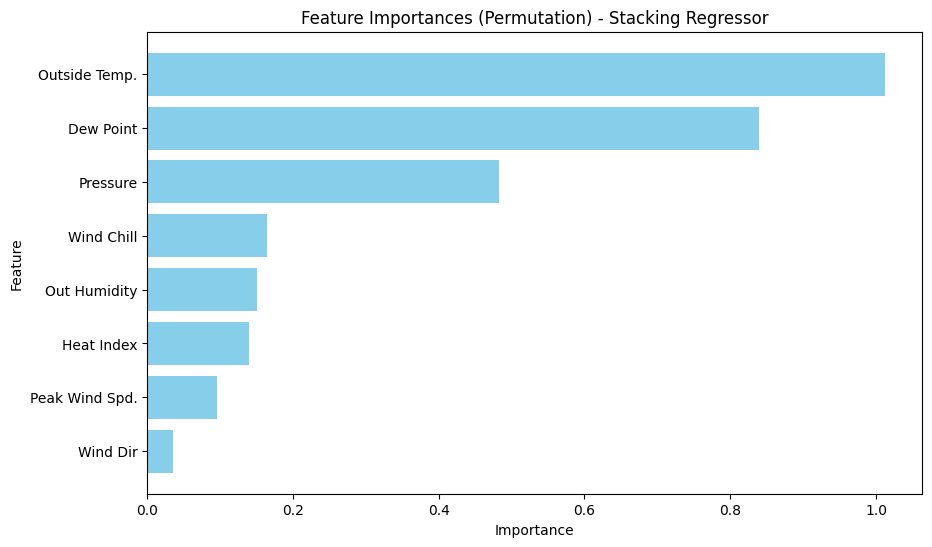

          Feature  Importance
0   Outside Temp.    1.012568
2       Dew Point    0.839094
5        Pressure    0.482829
1      Wind Chill    0.164439
4    Out Humidity    0.150530
3      Heat Index    0.140562
7  Peak Wind Spd.    0.095361
6        Wind Dir    0.035336


In [16]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Permutation Importance
perm_importance = permutation_importance(stacking_regressor, X_test_mod_scaled, y_test_mod, n_repeats=10, random_state=42)

# Crear DataFrame con los resultados
feature_importance_df = pd.DataFrame({
    'Feature': X_train_mod.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Permutation) - Stacking Regressor')
plt.gca().invert_yaxis()
plt.show()

# Mostrar las características más importantes
print(feature_importance_df)


## Feature Importances Across Models

In [20]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

# Extraer importancias de los modelos base
importancia_pred = []

for name, model in stacking_regressor.named_estimators_.items():  # Usar named_estimators_
    try:
        # Si el modelo tiene feature_importances_
        importancia = pd.DataFrame({
            'Feature': X_train_mod.columns,
            f'Importance_{name}': model.feature_importances_
        }).set_index('Feature')
    except AttributeError:
        try:
            # Si el modelo tiene coef_ (por ejemplo, modelos lineales)
            importancia = pd.DataFrame({
                'Feature': X_train_mod.columns,
                f'Importance_{name}': model.coef_
            }).set_index('Feature')
        except AttributeError:
            print(f"El modelo {name} no tiene feature_importances_ ni coef_, se calculará Permutation Importance.")

            # Calcular Permutation Importance para modelos sin atributos internos
            perm_importance = permutation_importance(model, X_test_mod_scaled, y_test_mod, n_repeats=10, random_state=42)
            importancia = pd.DataFrame({
                'Feature': X_train_mod.columns,
                f'Importance_{name}': perm_importance.importances_mean
            }).set_index('Feature')
    importancia_pred.append(importancia)

# Combinar las importancias de todos los modelos base
if importancia_pred:
    importancia_combined = pd.concat(importancia_pred, axis=1)
    print(importancia_combined)
else:
    print("Ningún modelo tiene atributos para calcular importancia de características.")


El modelo knn no tiene feature_importances_ ni coef_, se calculará Permutation Importance.
                Importance_rf  Importance_dt  Importance_gb  Importance_knn
Feature                                                                    
Outside Temp.        0.327523       0.313458       0.446058        0.908405
Wind Chill           0.040454       0.038162       0.038465        0.779300
Dew Point            0.285208       0.284124       0.383223        0.306115
Heat Index           0.046391       0.047466       0.026400        0.487960
Out Humidity         0.038223       0.038581       0.008228        0.452648
Pressure             0.164513       0.171708       0.038353        0.511869
Wind Dir             0.032272       0.030100       0.005875        0.143785
Peak Wind Spd.       0.065417       0.076402       0.053398        0.116154


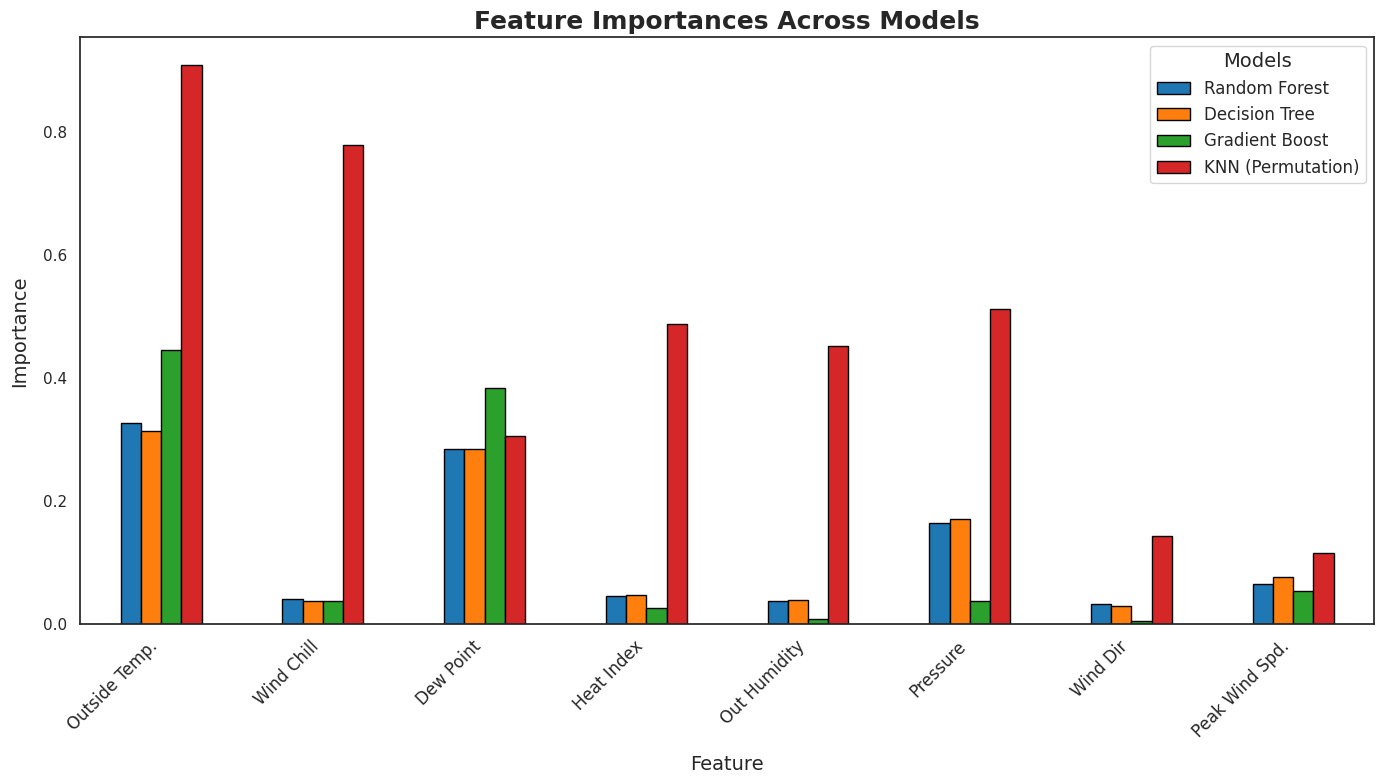

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo limpio sin rayas de fondo
sns.set_theme(style="white")

# Paleta de colores personalizada similar a la imagen proporcionada
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colores similares a los de tu gráfico

# Crear el gráfico de barras agrupadas
ax = importancia_combined.plot(
    kind='bar',
    figsize=(14, 8),
    color=custom_colors,  # Usar la paleta personalizada
    edgecolor='black'
)

# Personalizar el título y etiquetas
plt.title('Feature Importances Across Models', fontsize=18, fontweight='bold')
plt.xlabel('Feature', fontsize=14, labelpad=10)
plt.ylabel('Importance', fontsize=14, labelpad=10)

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)

# Personalizar la leyenda (dentro del cuadro, esquina superior derecha)
plt.legend(
    ['Random Forest', 'Decision Tree', 'Gradient Boost', 'KNN (Permutation)'],  # Cambiar etiquetas de la leyenda
    title='Models',
    fontsize=12,
    title_fontsize=14,
    loc='upper right',
    bbox_to_anchor=(1, 1)  # Dentro del cuadro
)

# Mejorar márgenes y diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


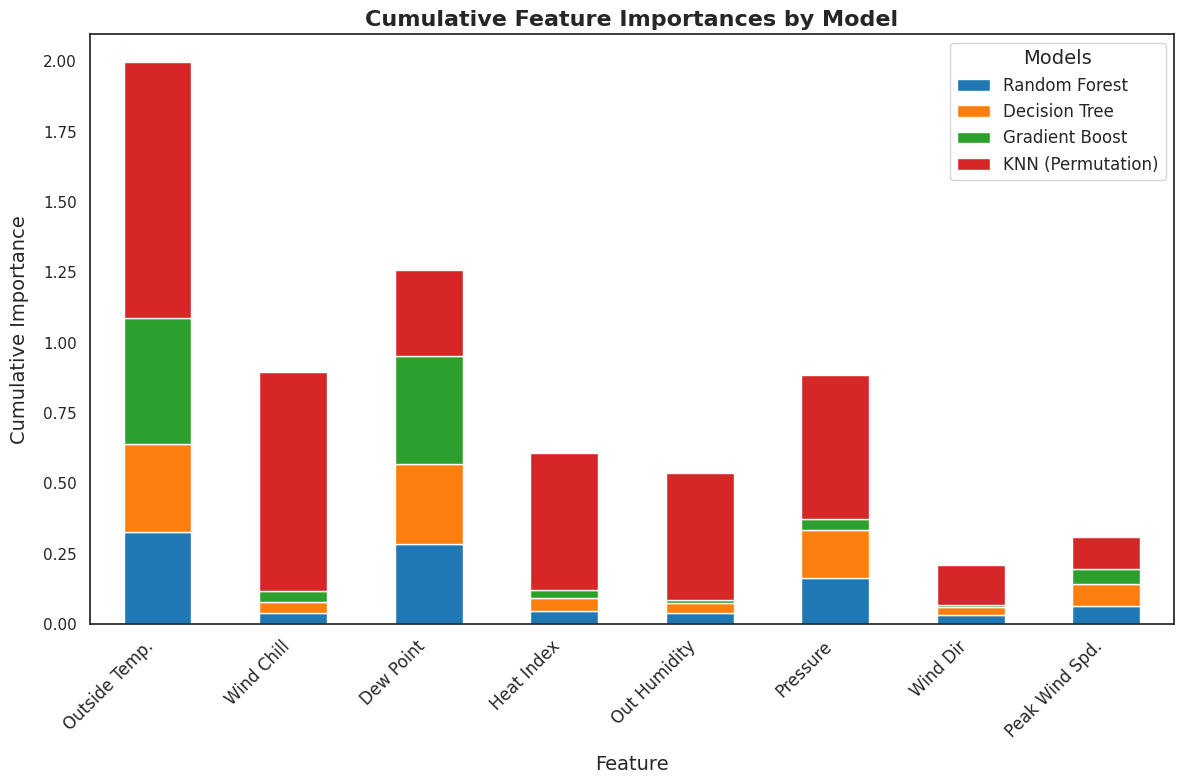

In [30]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras apiladas con los mismos colores
importancia_combined.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Usar la paleta de colores personalizada
)

# Personalizar el título y etiquetas
plt.title('Cumulative Feature Importances by Model', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14, labelpad=10)
plt.ylabel('Cumulative Importance', fontsize=14, labelpad=10)

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)

# Personalizar la leyenda con los nombres personalizados
plt.legend(
    ['Random Forest', 'Decision Tree', 'Gradient Boost', 'KNN (Permutation)'],  # Cambiar etiquetas de la leyenda
    title='Models',
    fontsize=12,
    title_fontsize=14,
    loc='upper right'
)

# Mejorar márgenes y diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Cross Validation Stacking Regressor (RF, DT, GB, KNN)

In [ ]:
from sklearn.model_selection import cross_val_score

# Definir los modelos base y el modelo meta
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]
final_estimator = LinearRegression()

# Crear el ensamble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Realizar validación cruzada
cv_scores = cross_val_score(stacking_regressor, X_train_mod_scaled, y_train_mod, cv=5, scoring='r2')

# Imprimir las puntuaciones y el promedio
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R^2 Score: {np.mean(cv_scores)}')


Cross-Validation R^2 Scores: [0.91357768 0.91703709 0.9079554  0.91710828 0.91153299]
Mean Cross-Validation R^2 Score: 0.9134422902434494


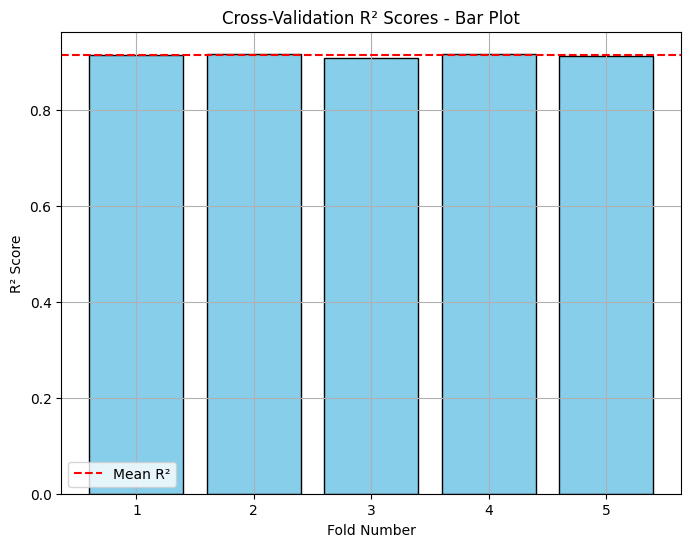

In [ ]:
# Crear un gráfico de barras para los R² scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', edgecolor='black')
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label='Mean R²')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('Cross-Validation R² Scores - Bar Plot')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()


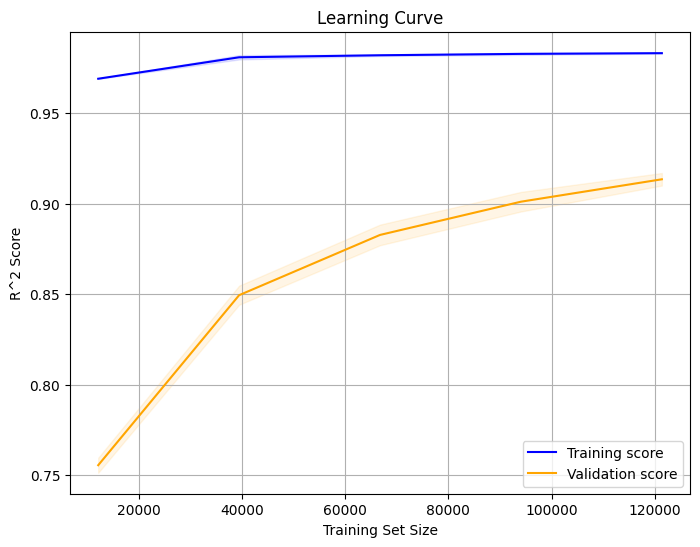

In [ ]:
from sklearn.model_selection import learning_curve

# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    stacking_regressor, X_train_mod_scaled, y_train_mod, cv=5, scoring='r2', n_jobs=-1)

# Calcular las medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation score', color='orange')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='orange', alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.show()


  ## Visualization of the Final Model

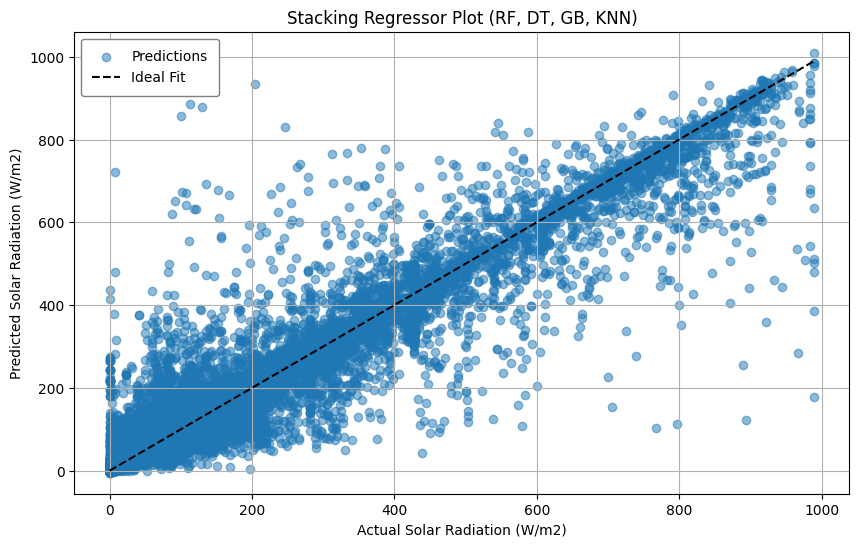

In [ ]:
# Gráfica de dispersión para comparación de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mod, y_pred_stacking, alpha=0.5, label='Predictions')
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], '--k', label='Ideal Fit')
plt.xlabel('Actual Solar Radiation (W/m2)')
plt.ylabel('Predicted Solar Radiation (W/m2)')
plt.title('Stacking Regressor (RF, DT, GB, KNN) - Real vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

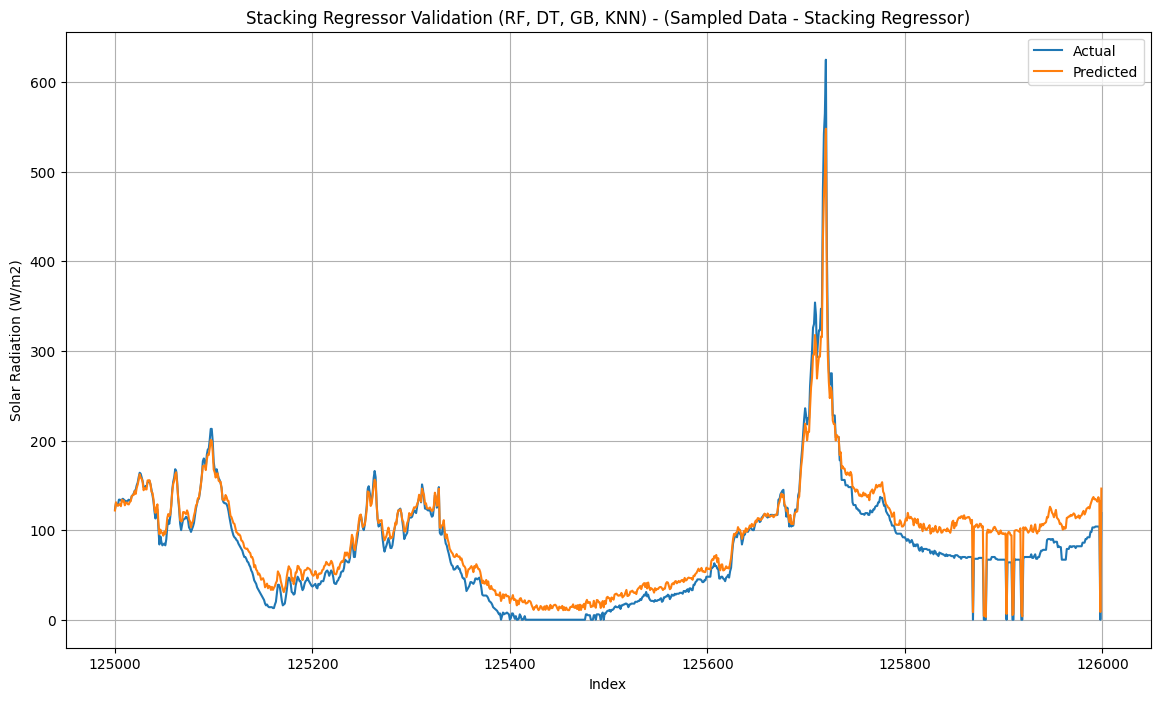

In [ ]:
# Entrenar el modelo con el conjunto completo
stacking_regressor.fit(X_modified, y_modified)

# Generar predicciones sobre el conjunto completo
y_pred_full_stacking = stacking_regressor.predict(X_modified)

# Gráfica de validación del modelo
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_modified)), y_modified, label='Actual', linewidth=2)
plt.plot(range(len(y_modified)), y_pred_full_stacking, label='Predicted', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (W/m2)')
plt.title('Stacking Regressor - Model Validation')
plt.legend()
plt.grid(True)
plt.show()

The **Stacking Regressor**, incorporating **Random Forest**, **Decision Tree**, **Gradient Boosting**, and **K-Nearest Neighbors** as base models, with a **Linear Regression** meta-model, exhibits exceptional performance in predicting solar radiation. The model achieves an impressive **R² of 92.24%**, meaning it captures over 92% of the variance in the data. Its **RMSE of 47.31 W/m²**, **MSE of 2238.53**, and **MAE of 18.27 W/m²** underscore its predictive accuracy and reliability.

The feature importance analysis, using Permutation Importance, highlights **Outside Temp. (1.012)**, **Dew Point (0.839)**, and **Pressure (0.483)** as the most influential features, emphasizing their critical roles in determining solar radiation. Variables like **Wind Chill (0.164)** and **Humidity (0.151)** offer additional predictive value, while **Wind Direction (0.035)** has minimal impact. Breaking down the contributions of the base models, **Random Forest**, **Decision Tree**, and **Gradient Boosting** consistently prioritize **Outside Temp.** and **Dew Point**, reflecting their strong correlations with atmospheric conditions. Meanwhile, **KNN**, analyzed using Permutation Importance, assigns notable weight to **Wind Chill** and **Outside Temp.**, demonstrating variability in how models interpret feature relevance.

The graphical analysis further validates the model’s robustness. The **scatter plot** comparing predictions against actual values shows a tight alignment along the ideal fit line, indicating excellent accuracy. The **validation plot** reveals that the model successfully captures trends in solar radiation, even during periods of high variance, maintaining consistent predictions across a range of values. The **learning curve** demonstrates the model's stability and improvement as training data increases, achieving convergence with minimal overfitting. The **cross-validation results** (average **R² of 91.34%**) confirm the model's generalizability across different subsets of the data.

In conclusion, the **Stacking Regressor** integrates the strengths of multiple ensemble techniques, providing state-of-the-art predictive performance. Its ability to balance high accuracy, generalization, and interpretability, combined with comprehensive feature importance analysis, makes it an outstanding choice for modeling complex phenomena like solar radiation.